In [1]:
! pip install ultralytics --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.9/777.9 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 39.6 MB/s eta 0:00:00


In [2]:
!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="ha9nSMpWufFA5W7Jd9UZ")
project = rf.workspace("drone-detection-g4d3g").project("drone-detection-a1tsf")
version = project.version(6)
dataset = version.download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.5/75.5 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.7 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.21, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Drone-Detection-6 in yolov8:: 100%|██████████| 19956/19956 [00:04<00:00, 4099.63it/s]


In [3]:
from ultralytics import YOLO

In [4]:
model=YOLO("yolov8s.pt")

100%|██████████| 21.5M/21.5M [00:00<00:00, 171MB/s]


In [6]:
model.train(data="/content/yolo_project_drone_detection/data.yaml", epochs=50, patience=0,
             plots=True, project='/content/yolo_project_drone_detection', batch=16, device=0.1)

Ultralytics YOLOv8.2.21 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0.1 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/yolo_project_drone_detection/data.yaml, epochs=50, time=None, patience=0, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0.1, workers=8, project=/content/yolo_project_drone_detection, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, sa

train: Scanning /content/yolo_project_drone_detection/Drone-Detection-6/train/labels.cache... 6979 images, 561 backgrounds, 0 corrupt: 100%|██████████| 6979/6979 [00:00<?, ?it/s]


WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1, len(boxes) = 6887. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/yolo_project_drone_detection/Drone-Detection-6/valid/labels.cache... 1994 images, 145 backgrounds, 0 corrupt: 100%|██████████| 1994/1994 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 7, len(boxes) = 1975. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to /content/yolo_project_drone_detection/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/yolo_project_drone_detection/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      8.85G      1.393      1.339       1.52         33        640: 100%|█████████▉| 436/437 [02:56<00:00,  1.93it/s]Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
       1/50      8.86G      1.393      1.339       1.52          9        640: 100%|██████████| 437/437 [02:57<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:23<00:00,  2.70it/s]


                   all       1994       1975      0.713      0.636      0.706      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      9.34G      1.509      1.455      1.624          6        640: 100%|██████████| 437/437 [02:51<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:25<00:00,  2.45it/s]


                   all       1994       1975      0.751        0.6      0.707       0.41

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      9.34G      1.441       1.37      1.565          7        640: 100%|██████████| 437/437 [02:47<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:22<00:00,  2.80it/s]


                   all       1994       1975      0.801      0.738      0.805      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      9.23G      1.379      1.249      1.519          9        640: 100%|██████████| 437/437 [02:47<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:22<00:00,  2.77it/s]

                   all       1994       1975      0.854      0.791      0.865      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      9.19G       1.33      1.152       1.49          5        640: 100%|██████████| 437/437 [02:46<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:24<00:00,  2.53it/s]

                   all       1994       1975      0.879      0.758      0.864      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      9.32G      1.286      1.089      1.461          5        640: 100%|██████████| 437/437 [02:47<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:22<00:00,  2.79it/s]

                   all       1994       1975      0.888      0.818      0.902      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      9.22G      1.253      1.034      1.433         11        640: 100%|██████████| 437/437 [02:45<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:22<00:00,  2.84it/s]

                   all       1994       1975       0.88      0.784      0.873      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      9.18G      1.241      1.003       1.42          4        640: 100%|██████████| 437/437 [02:44<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:22<00:00,  2.79it/s]


                   all       1994       1975      0.882       0.84      0.907      0.611

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      9.18G        1.2     0.9607      1.397          7        640: 100%|██████████| 437/437 [02:46<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:23<00:00,  2.73it/s]


                   all       1994       1975      0.906       0.85      0.926       0.63

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      9.32G      1.181     0.9055      1.384          4        640: 100%|██████████| 437/437 [02:44<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:24<00:00,  2.60it/s]


                   all       1994       1975      0.885      0.867      0.929      0.648

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      9.21G       1.17     0.9138      1.378          6        640: 100%|██████████| 437/437 [02:44<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:22<00:00,  2.75it/s]

                   all       1994       1975       0.89      0.882      0.935      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      9.18G      1.151     0.8852      1.361          9        640: 100%|██████████| 437/437 [02:43<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:22<00:00,  2.81it/s]

                   all       1994       1975      0.912      0.886      0.943      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      9.18G      1.135     0.8512       1.36          5        640: 100%|██████████| 437/437 [02:58<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:23<00:00,  2.64it/s]

                   all       1994       1975      0.928      0.865      0.938      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      9.31G      1.115     0.8305      1.339         11        640: 100%|██████████| 437/437 [02:55<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:25<00:00,  2.52it/s]

                   all       1994       1975      0.932      0.875      0.939       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      9.21G       1.12     0.8216      1.348          5        640: 100%|██████████| 437/437 [02:54<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:23<00:00,  2.74it/s]

                   all       1994       1975      0.931      0.897      0.954      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      9.18G      1.088     0.8017      1.323          3        640: 100%|██████████| 437/437 [02:49<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:23<00:00,  2.70it/s]

                   all       1994       1975       0.95      0.883      0.953      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      9.18G      1.093     0.7888      1.324          9        640: 100%|██████████| 437/437 [02:48<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:25<00:00,  2.48it/s]

                   all       1994       1975      0.928      0.887      0.952      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      9.31G      1.074     0.7709      1.313          5        640: 100%|██████████| 437/437 [02:47<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:23<00:00,  2.72it/s]

                   all       1994       1975      0.941      0.898      0.951      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      9.21G      1.088     0.7714      1.316          6        640: 100%|██████████| 437/437 [02:46<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:22<00:00,  2.84it/s]

                   all       1994       1975      0.922      0.922      0.961      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      9.19G      1.058     0.7444        1.3          7        640: 100%|██████████| 437/437 [02:46<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:24<00:00,  2.59it/s]

                   all       1994       1975      0.934      0.913      0.962      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      9.18G       1.06     0.7455      1.299          3        640: 100%|██████████| 437/437 [02:46<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:22<00:00,  2.75it/s]

                   all       1994       1975      0.937       0.91       0.96      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      9.32G      1.042       0.72       1.29         11        640: 100%|██████████| 437/437 [02:47<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:22<00:00,  2.77it/s]

                   all       1994       1975      0.925      0.909      0.959      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      9.22G      1.038      0.717      1.285          7        640: 100%|██████████| 437/437 [02:50<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:26<00:00,  2.39it/s]

                   all       1994       1975       0.93      0.915      0.962      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      9.18G      1.034     0.7064      1.285          2        640: 100%|██████████| 437/437 [02:49<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:22<00:00,  2.76it/s]

                   all       1994       1975      0.936      0.909      0.962      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      9.19G      1.036     0.7115      1.285         13        640: 100%|██████████| 437/437 [02:48<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:22<00:00,  2.79it/s]


                   all       1994       1975      0.934      0.929      0.967      0.715

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      9.16G      1.014     0.6901      1.276          9        640: 100%|██████████| 437/437 [02:50<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:23<00:00,  2.65it/s]

                   all       1994       1975      0.928       0.93      0.965      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      9.21G      1.014     0.6824       1.27         10        640: 100%|██████████| 437/437 [02:46<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:22<00:00,  2.78it/s]


                   all       1994       1975      0.942      0.916      0.961      0.693

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      9.18G      1.004     0.6778       1.27          2        640: 100%|██████████| 437/437 [02:48<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:25<00:00,  2.47it/s]

                   all       1994       1975      0.939      0.938       0.97      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      9.18G      1.001     0.6626      1.266          7        640: 100%|██████████| 437/437 [02:47<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:22<00:00,  2.76it/s]

                   all       1994       1975      0.934      0.939      0.971      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      9.32G     0.9757      0.646      1.247         10        640: 100%|██████████| 437/437 [02:44<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:22<00:00,  2.84it/s]


                   all       1994       1975      0.951      0.935      0.969      0.718

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      9.21G     0.9797     0.6456      1.248          5        640: 100%|██████████| 437/437 [02:46<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:25<00:00,  2.48it/s]

                   all       1994       1975      0.947      0.945      0.973      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      9.18G      0.969     0.6307      1.241          6        640: 100%|██████████| 437/437 [02:47<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:22<00:00,  2.82it/s]

                   all       1994       1975       0.95      0.939      0.969      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      9.18G     0.9706     0.6268       1.24          9        640: 100%|██████████| 437/437 [02:46<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:22<00:00,  2.85it/s]

                   all       1994       1975      0.943      0.931      0.968      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      9.32G     0.9571     0.6169      1.229          3        640: 100%|██████████| 437/437 [02:44<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:24<00:00,  2.61it/s]

                   all       1994       1975      0.949      0.943      0.972      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      9.21G     0.9551     0.6093      1.227          4        640: 100%|██████████| 437/437 [02:45<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:24<00:00,  2.61it/s]


                   all       1994       1975      0.942      0.948      0.968      0.717

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      9.18G     0.9474     0.6019      1.223          7        640: 100%|██████████| 437/437 [02:48<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:22<00:00,  2.85it/s]

                   all       1994       1975      0.946      0.947      0.973      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      9.18G     0.9465     0.5962      1.218          6        640: 100%|██████████| 437/437 [02:46<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:21<00:00,  2.88it/s]

                   all       1994       1975      0.941       0.95      0.971      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      9.31G     0.9384     0.5848      1.219          3        640: 100%|██████████| 437/437 [02:46<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:25<00:00,  2.49it/s]

                   all       1994       1975      0.948      0.951      0.972      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      9.21G     0.9401     0.5885      1.223         13        640: 100%|██████████| 437/437 [02:47<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:21<00:00,  2.88it/s]

                   all       1994       1975      0.945      0.957      0.973      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      9.18G     0.9292     0.5837      1.218          6        640: 100%|██████████| 437/437 [02:45<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:23<00:00,  2.66it/s]

                   all       1994       1975      0.956      0.949      0.973      0.735


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      9.18G      0.837     0.4262      1.147          3        640: 100%|██████████| 437/437 [02:40<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:23<00:00,  2.73it/s]

                   all       1994       1975      0.944      0.953      0.973      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      9.32G     0.8179     0.4121      1.138          4        640: 100%|██████████| 437/437 [02:37<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:22<00:00,  2.81it/s]

                   all       1994       1975      0.949       0.95      0.973      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      9.21G     0.8031     0.4006      1.132          2        640: 100%|██████████| 437/437 [02:49<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:25<00:00,  2.50it/s]

                   all       1994       1975      0.952      0.953      0.974      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      9.18G     0.7985     0.3922      1.131          3        640: 100%|██████████| 437/437 [02:37<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:24<00:00,  2.56it/s]


                   all       1994       1975      0.952      0.954      0.972       0.74

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      9.18G     0.7901     0.3879      1.123          3        640: 100%|██████████| 437/437 [02:39<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:22<00:00,  2.75it/s]

                   all       1994       1975       0.96      0.957      0.973       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      9.38G     0.7799     0.3819       1.12          2        640: 100%|██████████| 437/437 [02:39<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:21<00:00,  2.88it/s]

                   all       1994       1975      0.958      0.958      0.975      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      9.21G     0.7729     0.3732      1.111          3        640: 100%|██████████| 437/437 [02:40<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:23<00:00,  2.73it/s]

                   all       1994       1975      0.964      0.957      0.975      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      9.18G     0.7629     0.3663      1.105          4        640: 100%|██████████| 437/437 [02:38<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:23<00:00,  2.65it/s]

                   all       1994       1975      0.961      0.957      0.975      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      9.18G     0.7563     0.3607      1.102          3        640: 100%|██████████| 437/437 [02:36<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:24<00:00,  2.54it/s]

                   all       1994       1975      0.964      0.956      0.975       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      9.32G     0.7566     0.3628      1.106          3        640: 100%|██████████| 437/437 [02:35<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:22<00:00,  2.77it/s]


                   all       1994       1975      0.965      0.956      0.977      0.754

50 epochs completed in 2.655 hours.
Optimizer stripped from /content/yolo_project_drone_detection/train2/weights/last.pt, 22.5MB
Optimizer stripped from /content/yolo_project_drone_detection/train2/weights/best.pt, 22.5MB

Validating /content/yolo_project_drone_detection/train2/weights/best.pt...
Ultralytics YOLOv8.2.21 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0.1 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:24<00:00,  2.55it/s]


                   all       1994       1975      0.965      0.956      0.977      0.754
Speed: 0.3ms preprocess, 4.6ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to /content/yolo_project_drone_detection/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e45848593c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [7]:
from IPython.display import Image

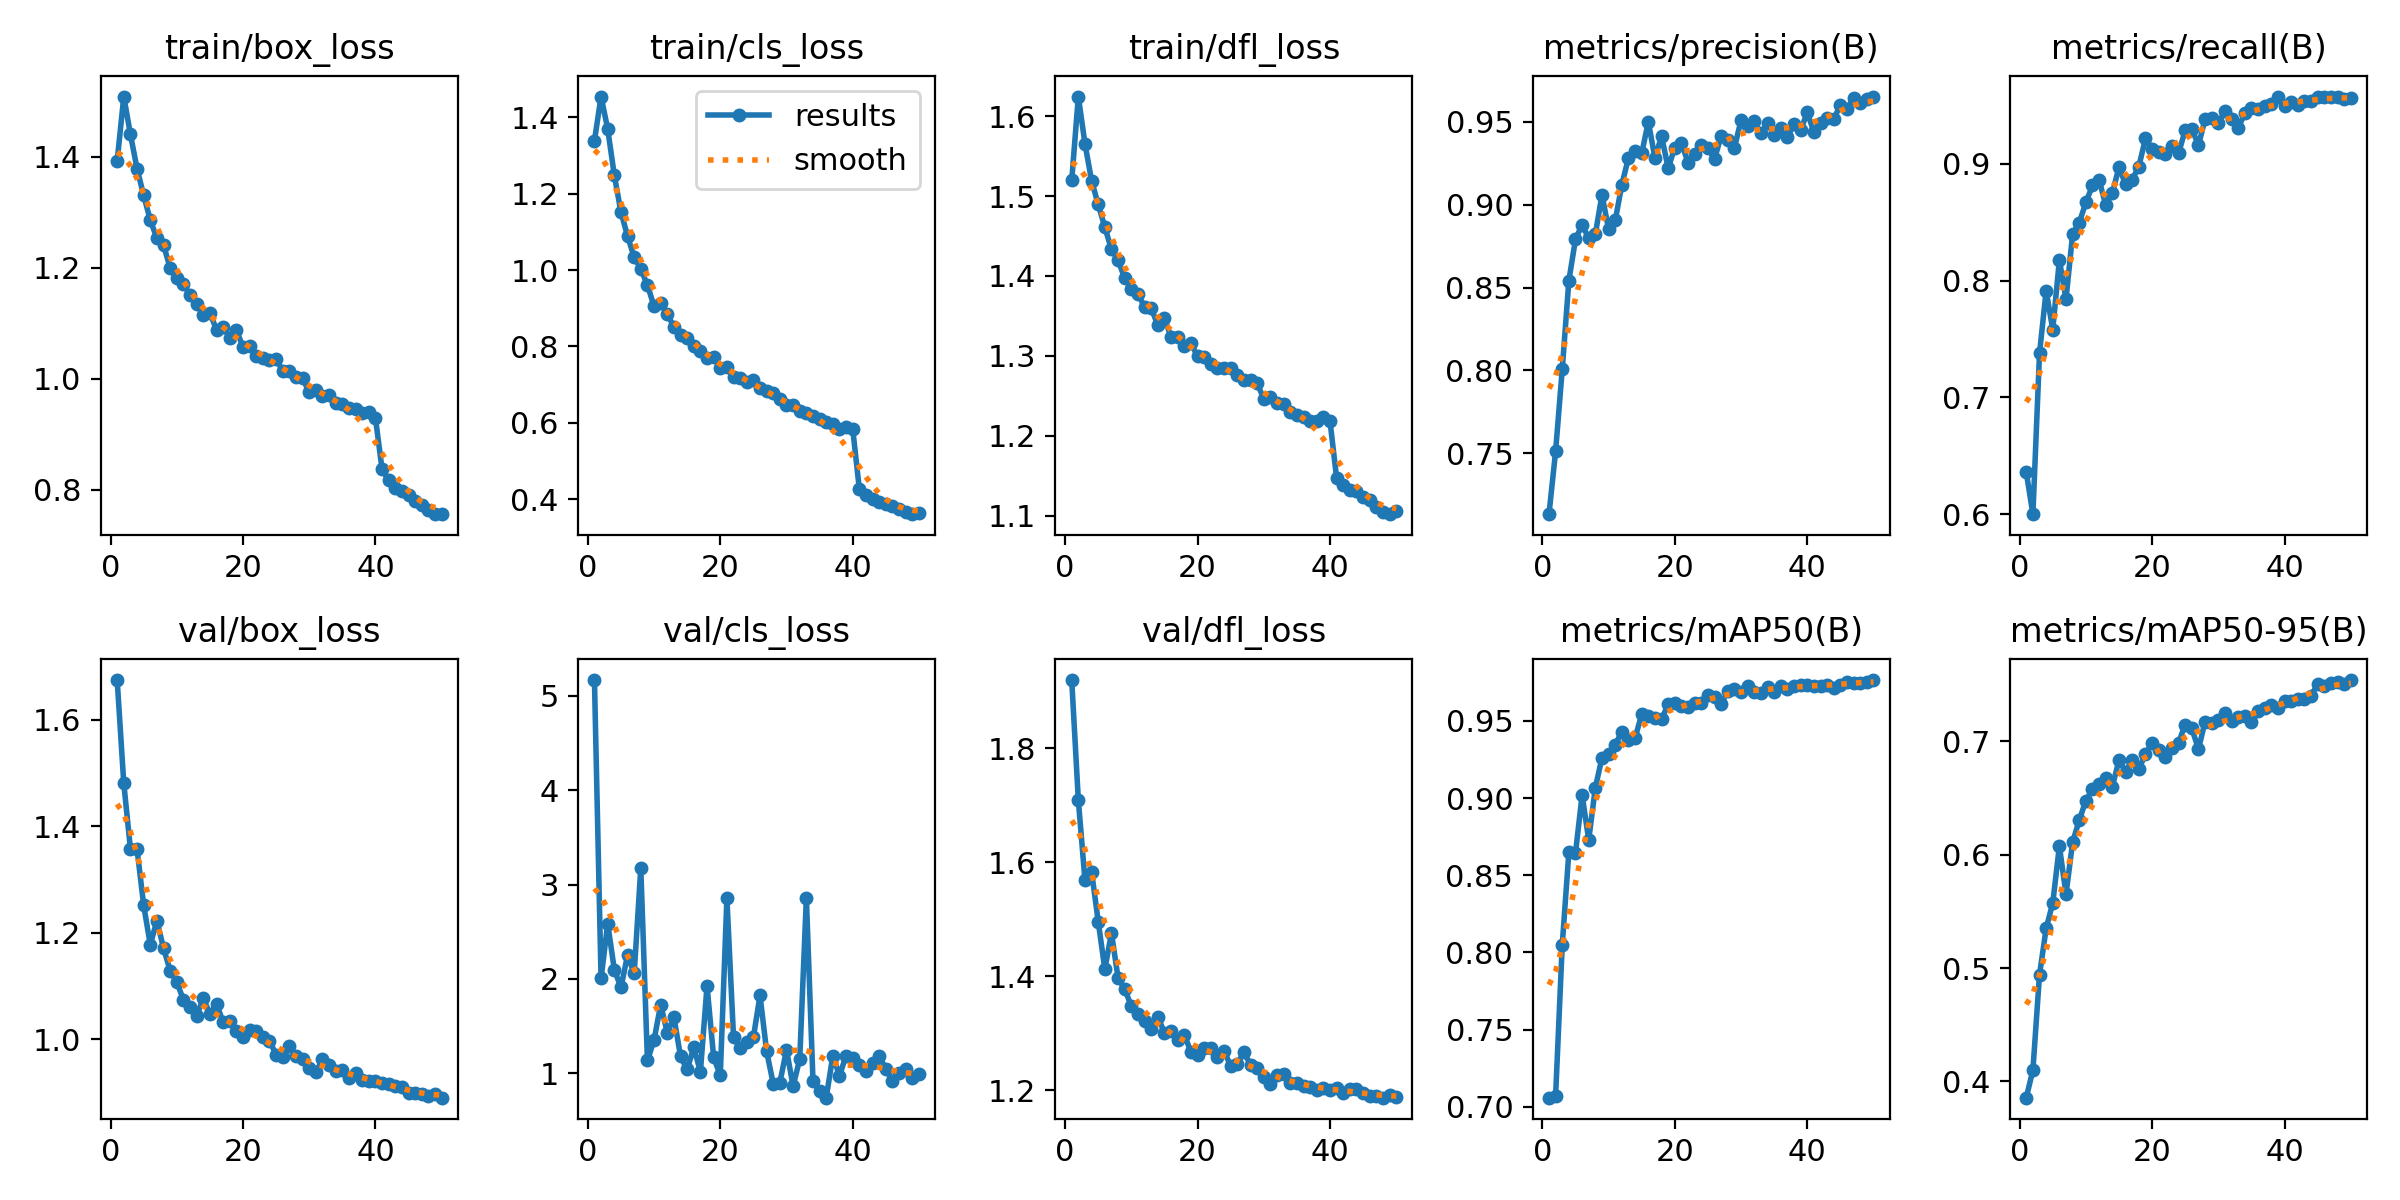

In [8]:
Image("/content/yolo_project_drone_detection/train2/results.png")

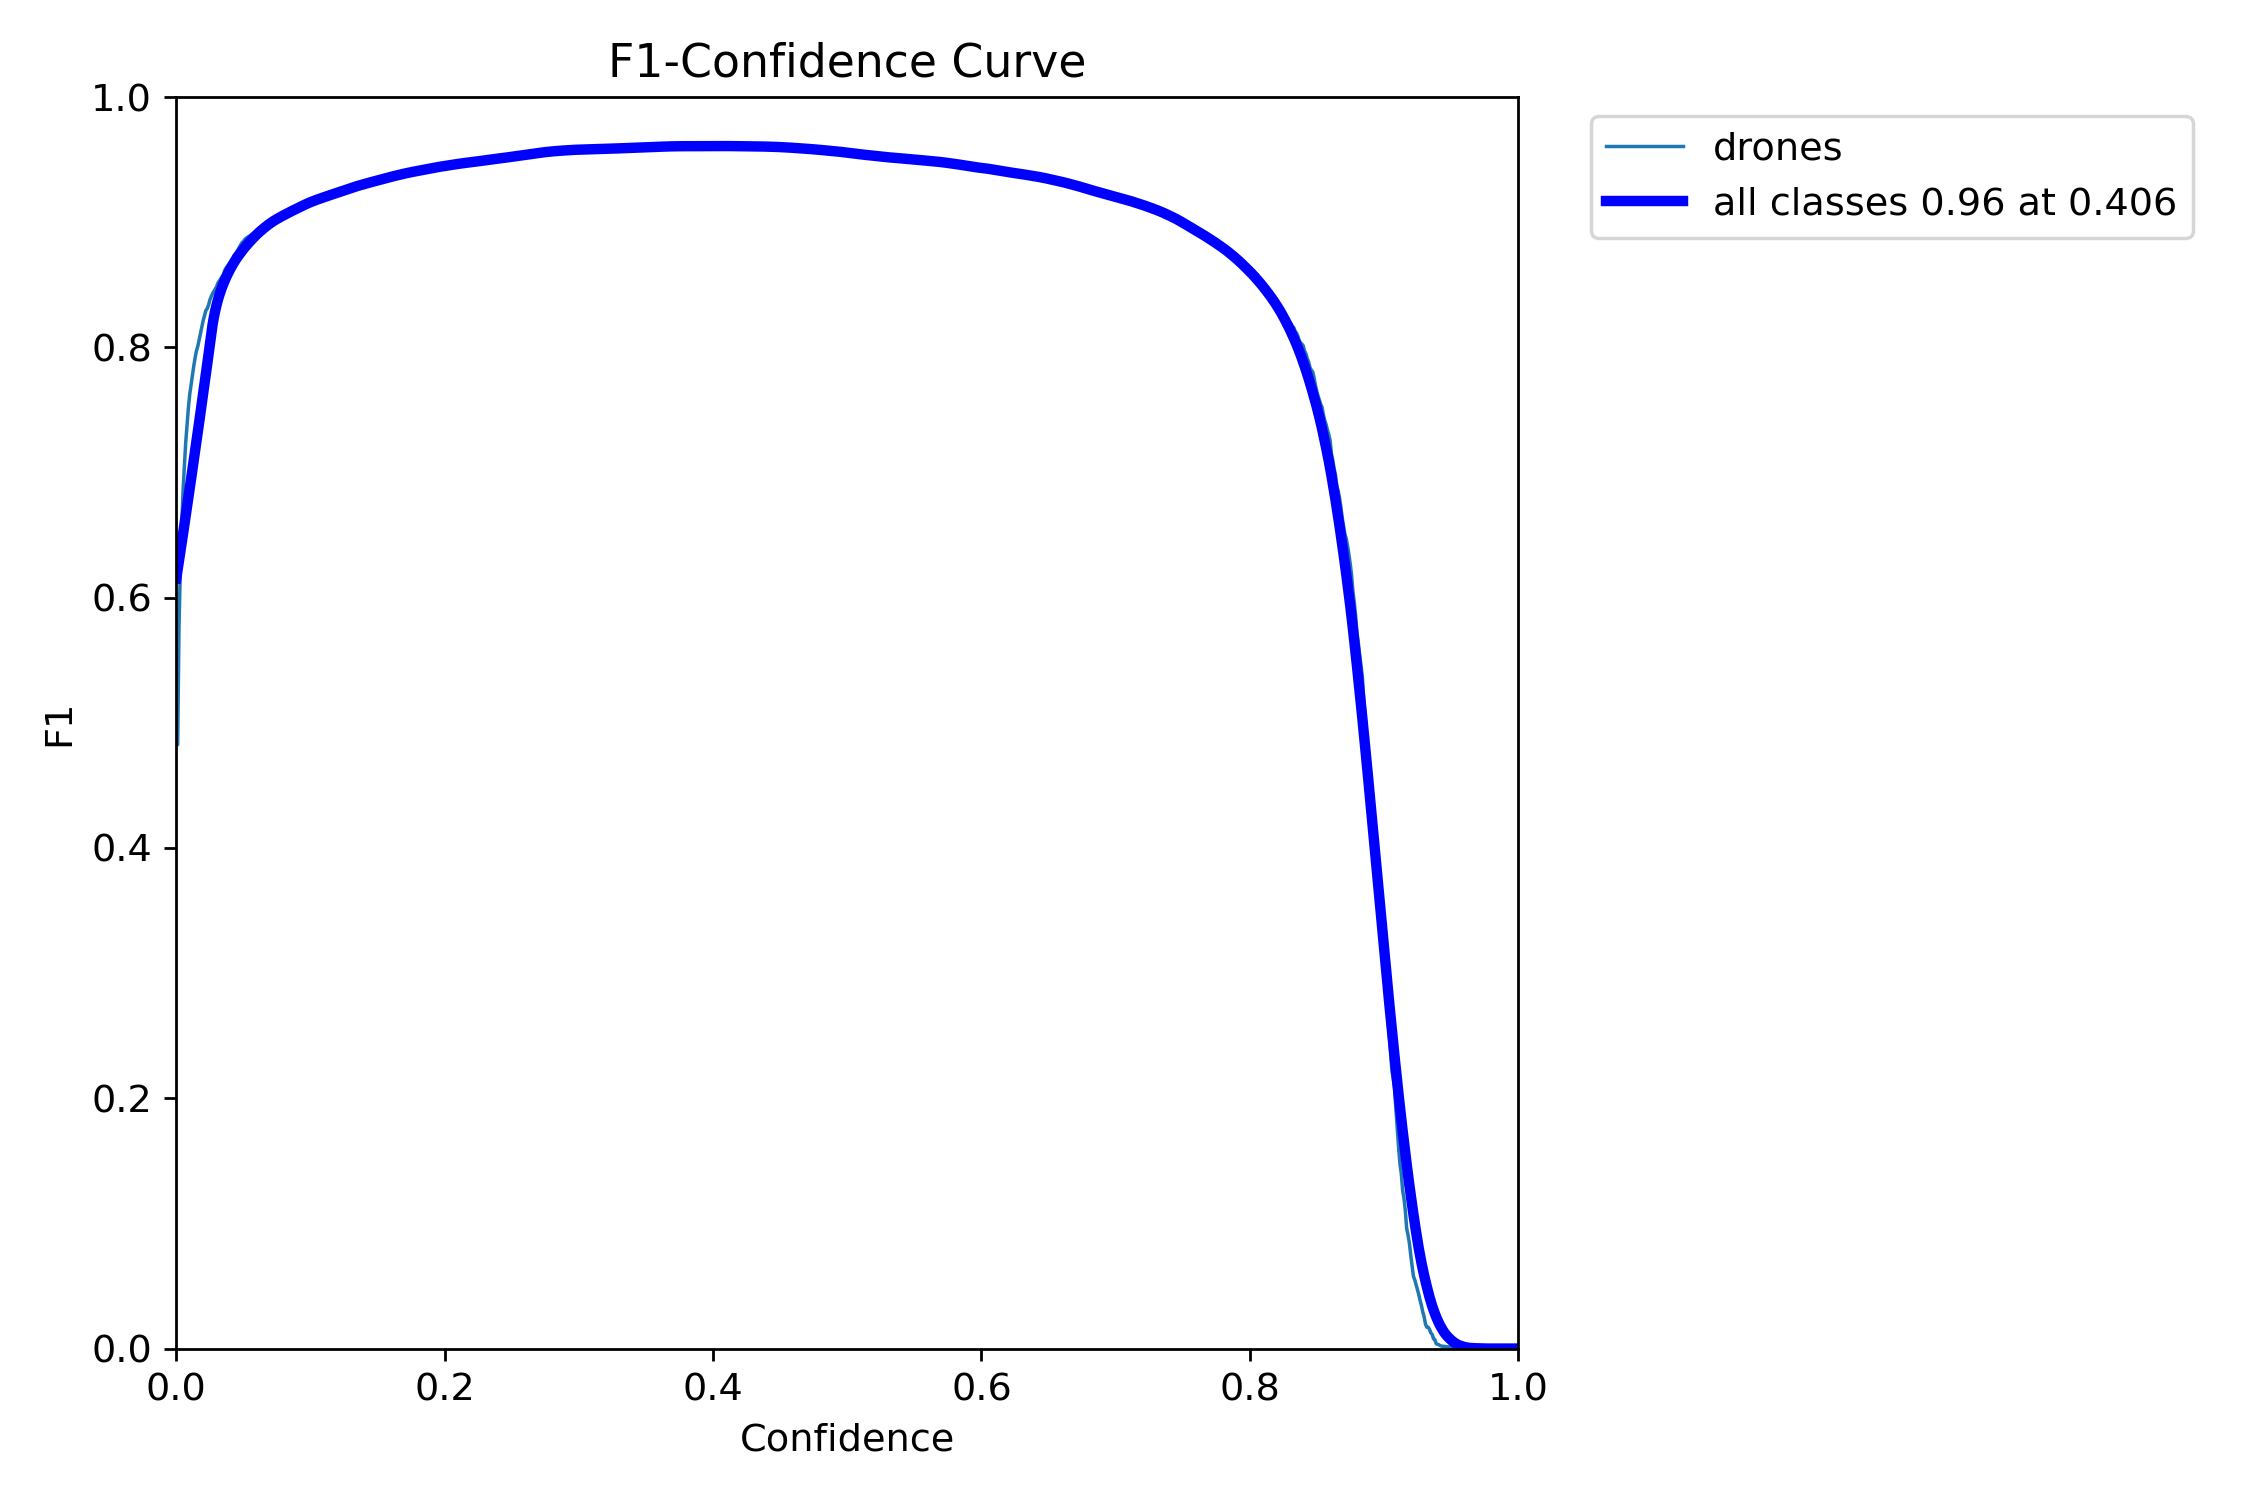

In [9]:
Image("/content/yolo_project_drone_detection/train2/F1_curve.png")

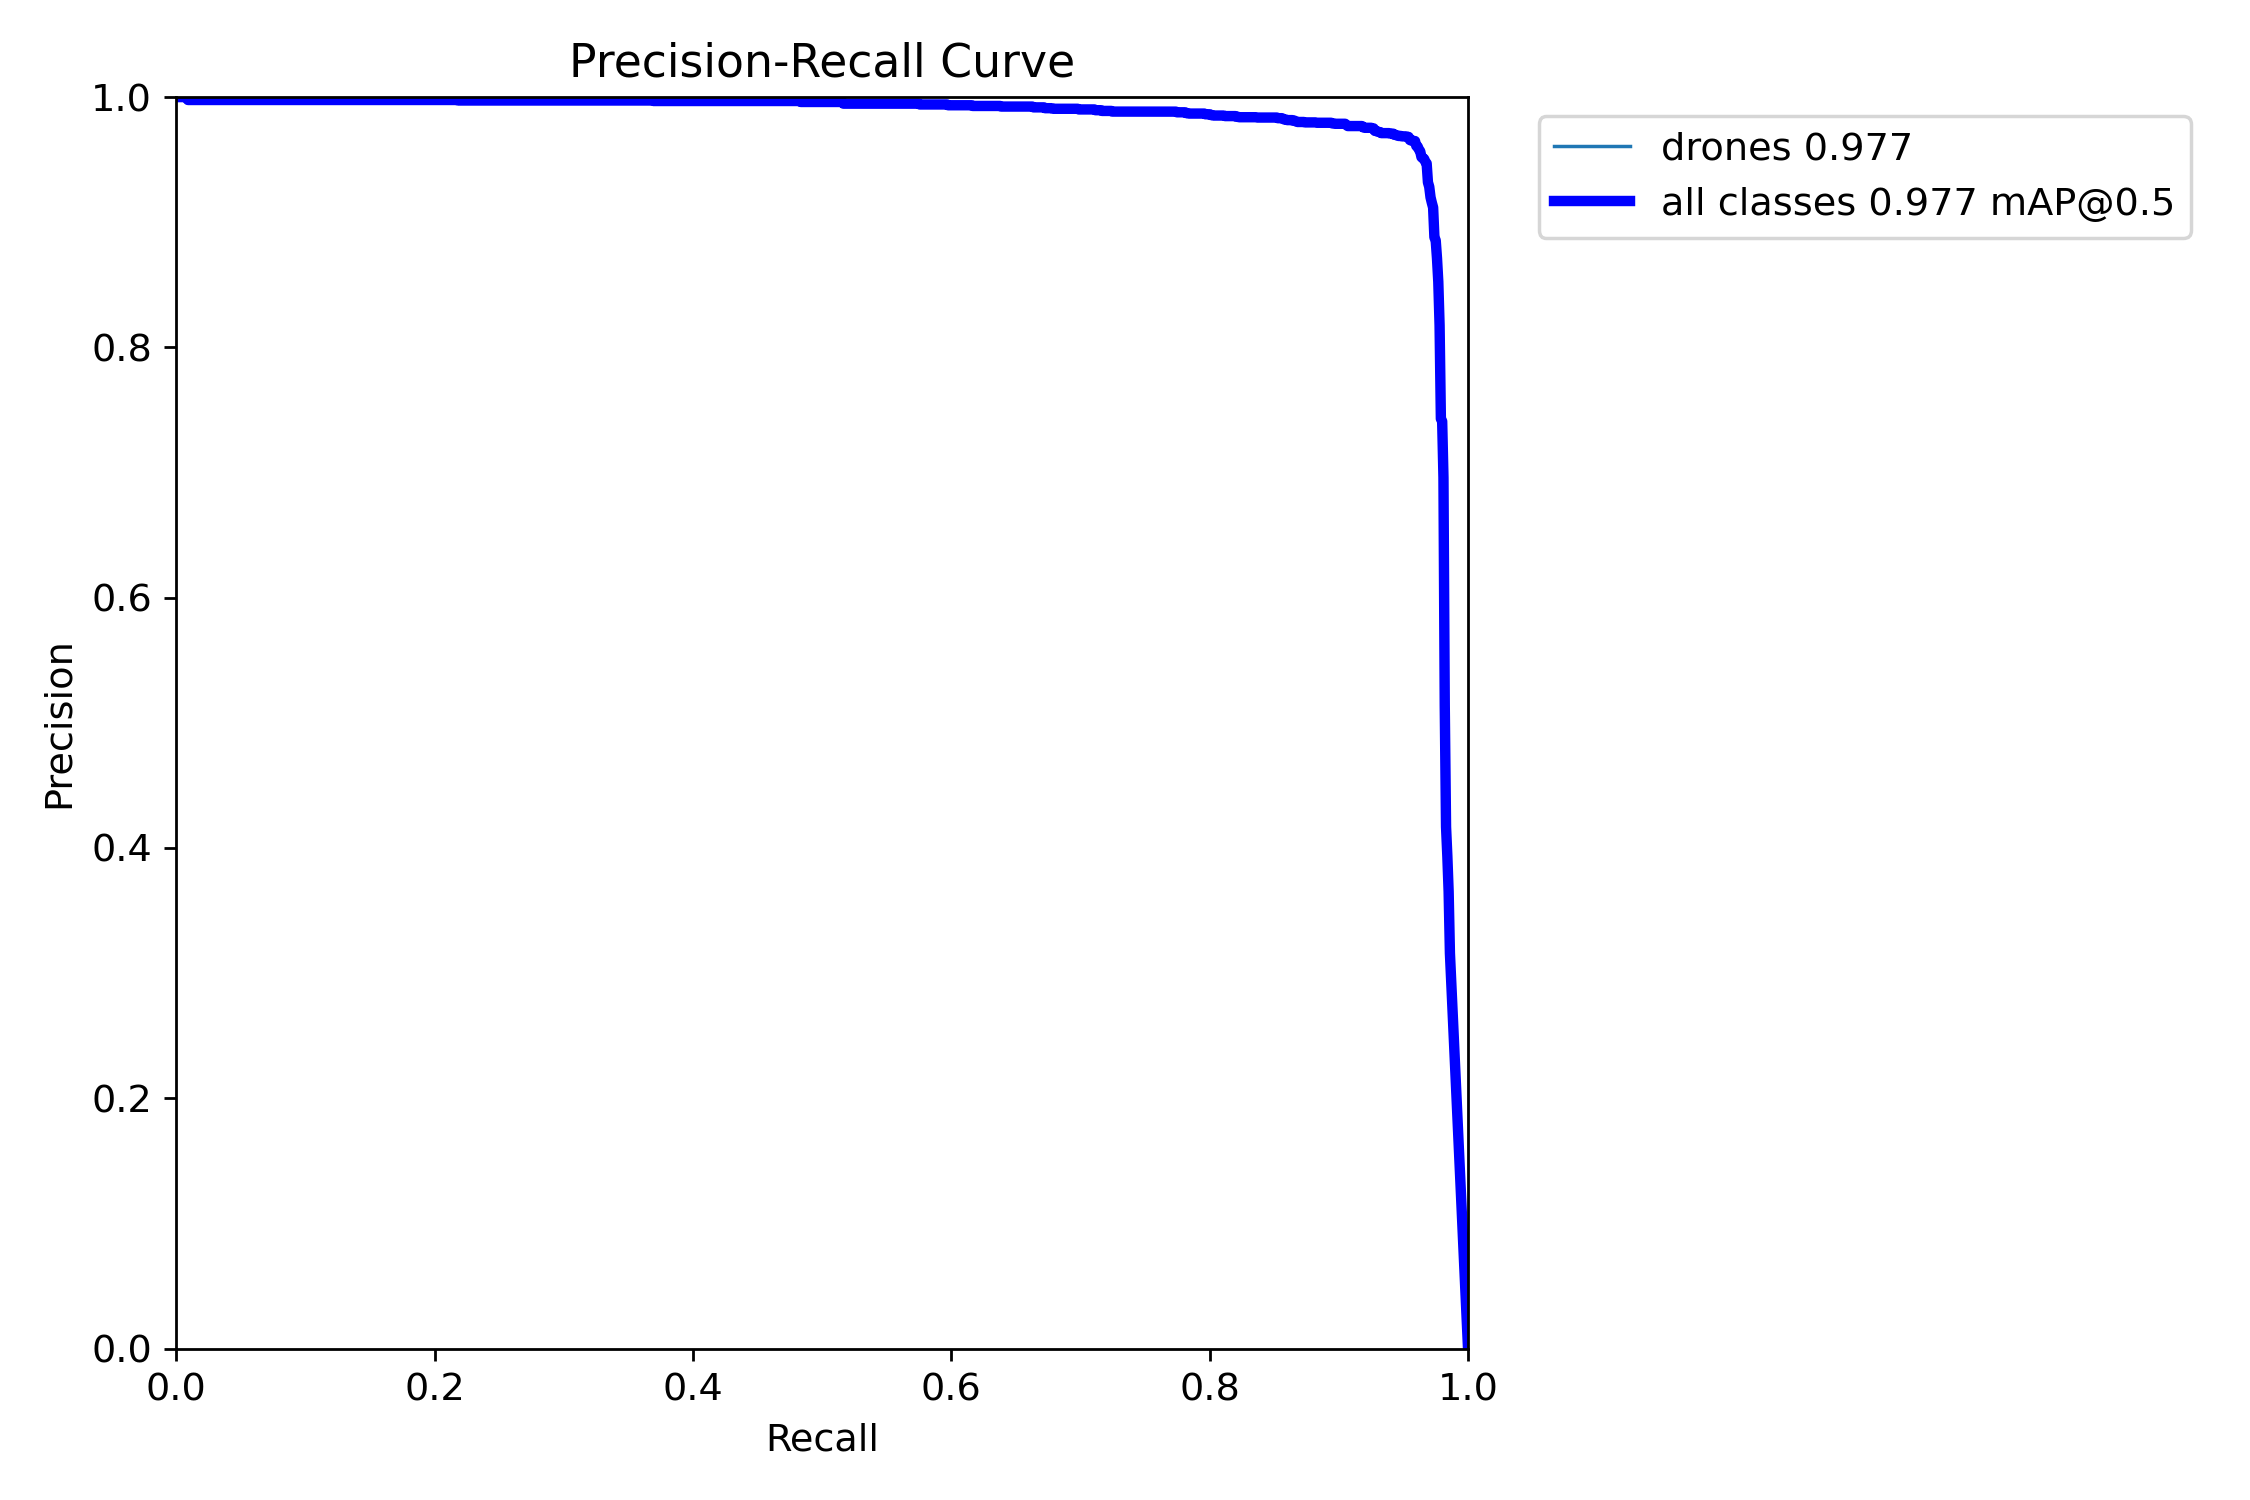

In [10]:
Image("/content/yolo_project_drone_detection/train2/PR_curve.png")

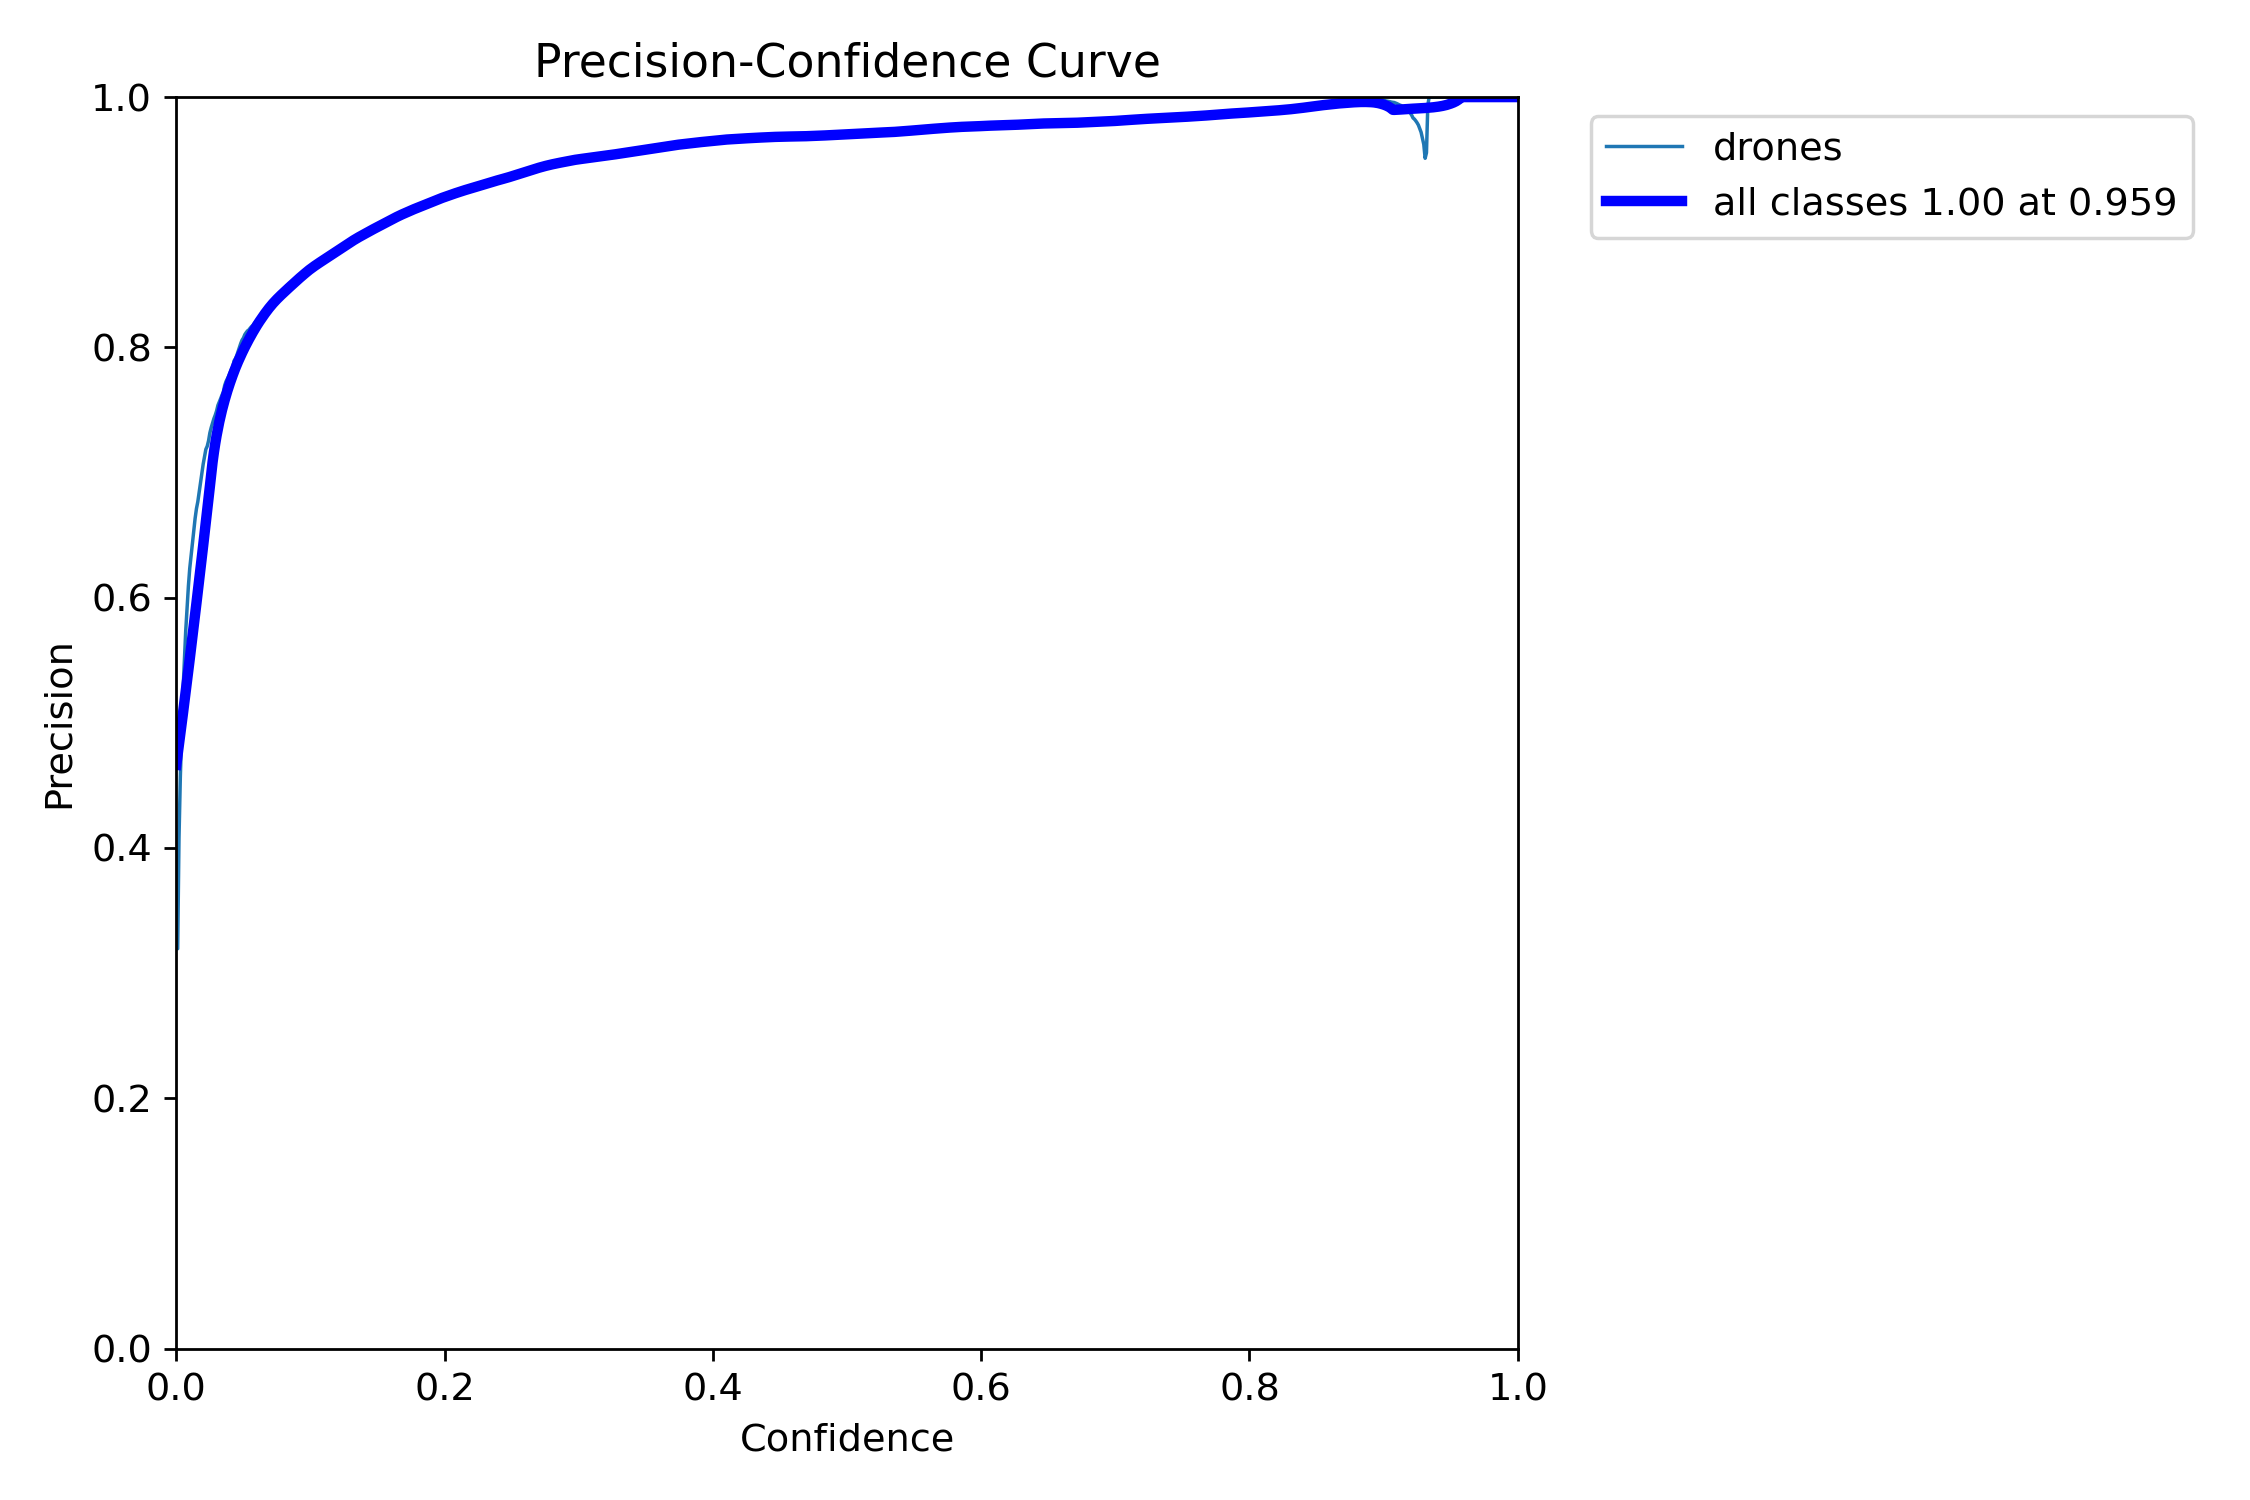

In [11]:
Image("/content/yolo_project_drone_detection/train2/P_curve.png")

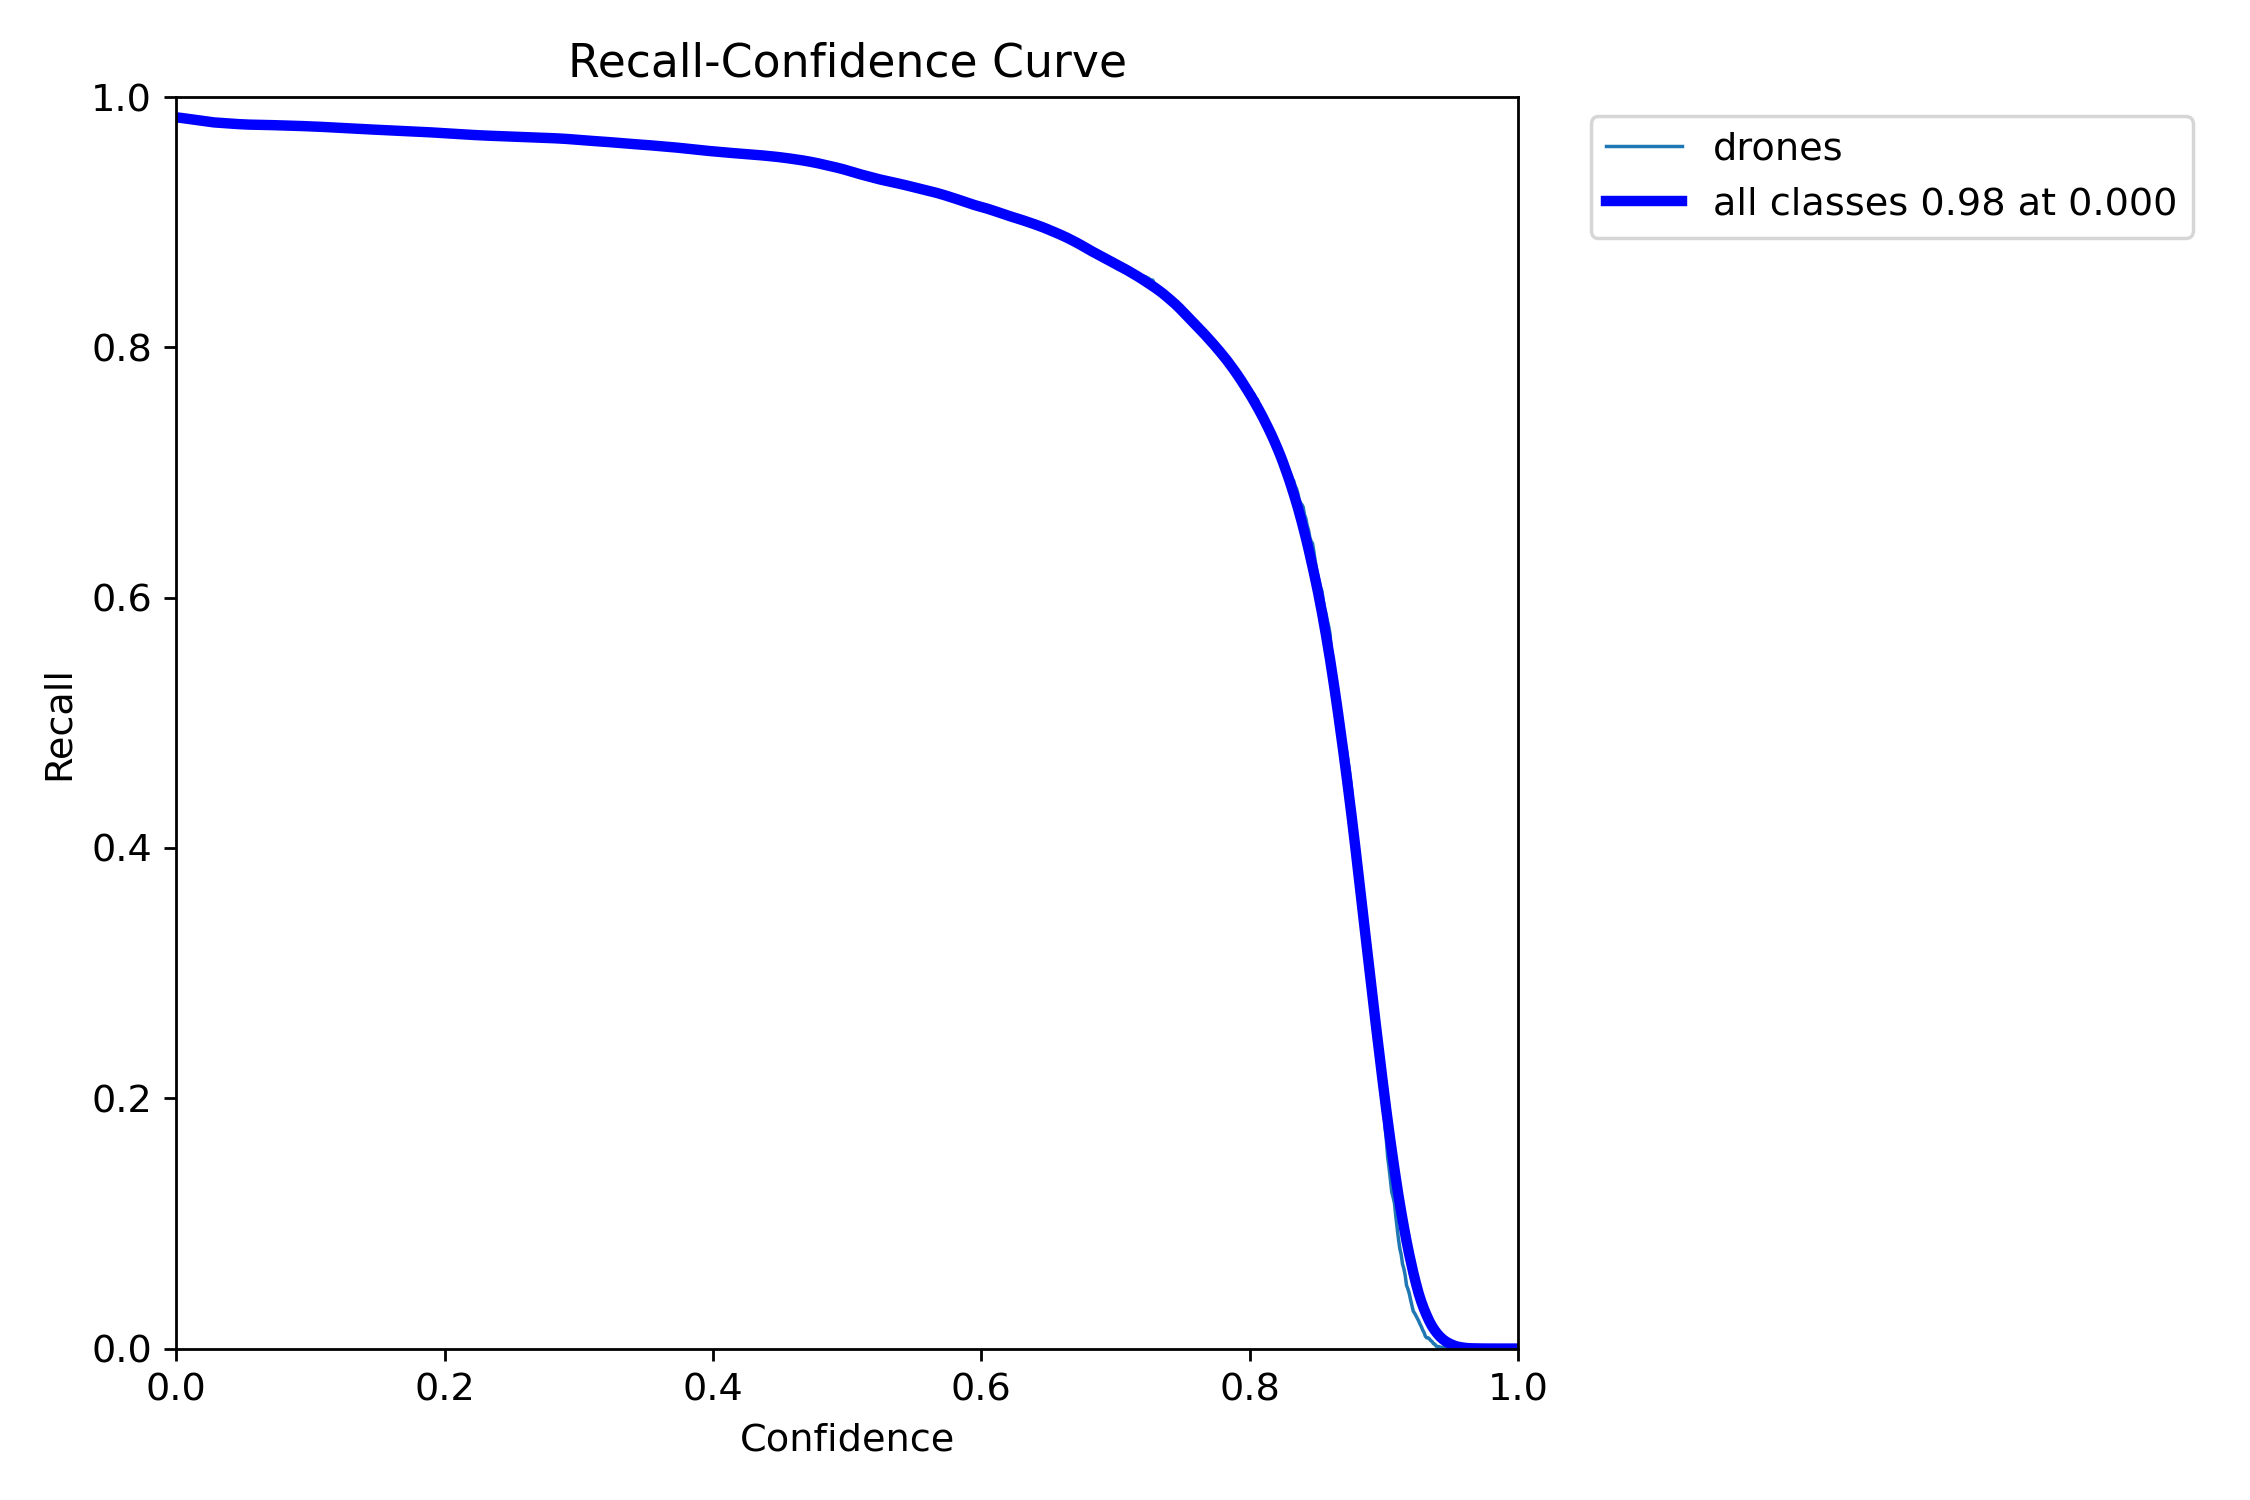

In [12]:
Image("/content/yolo_project_drone_detection/train2/R_curve.png")

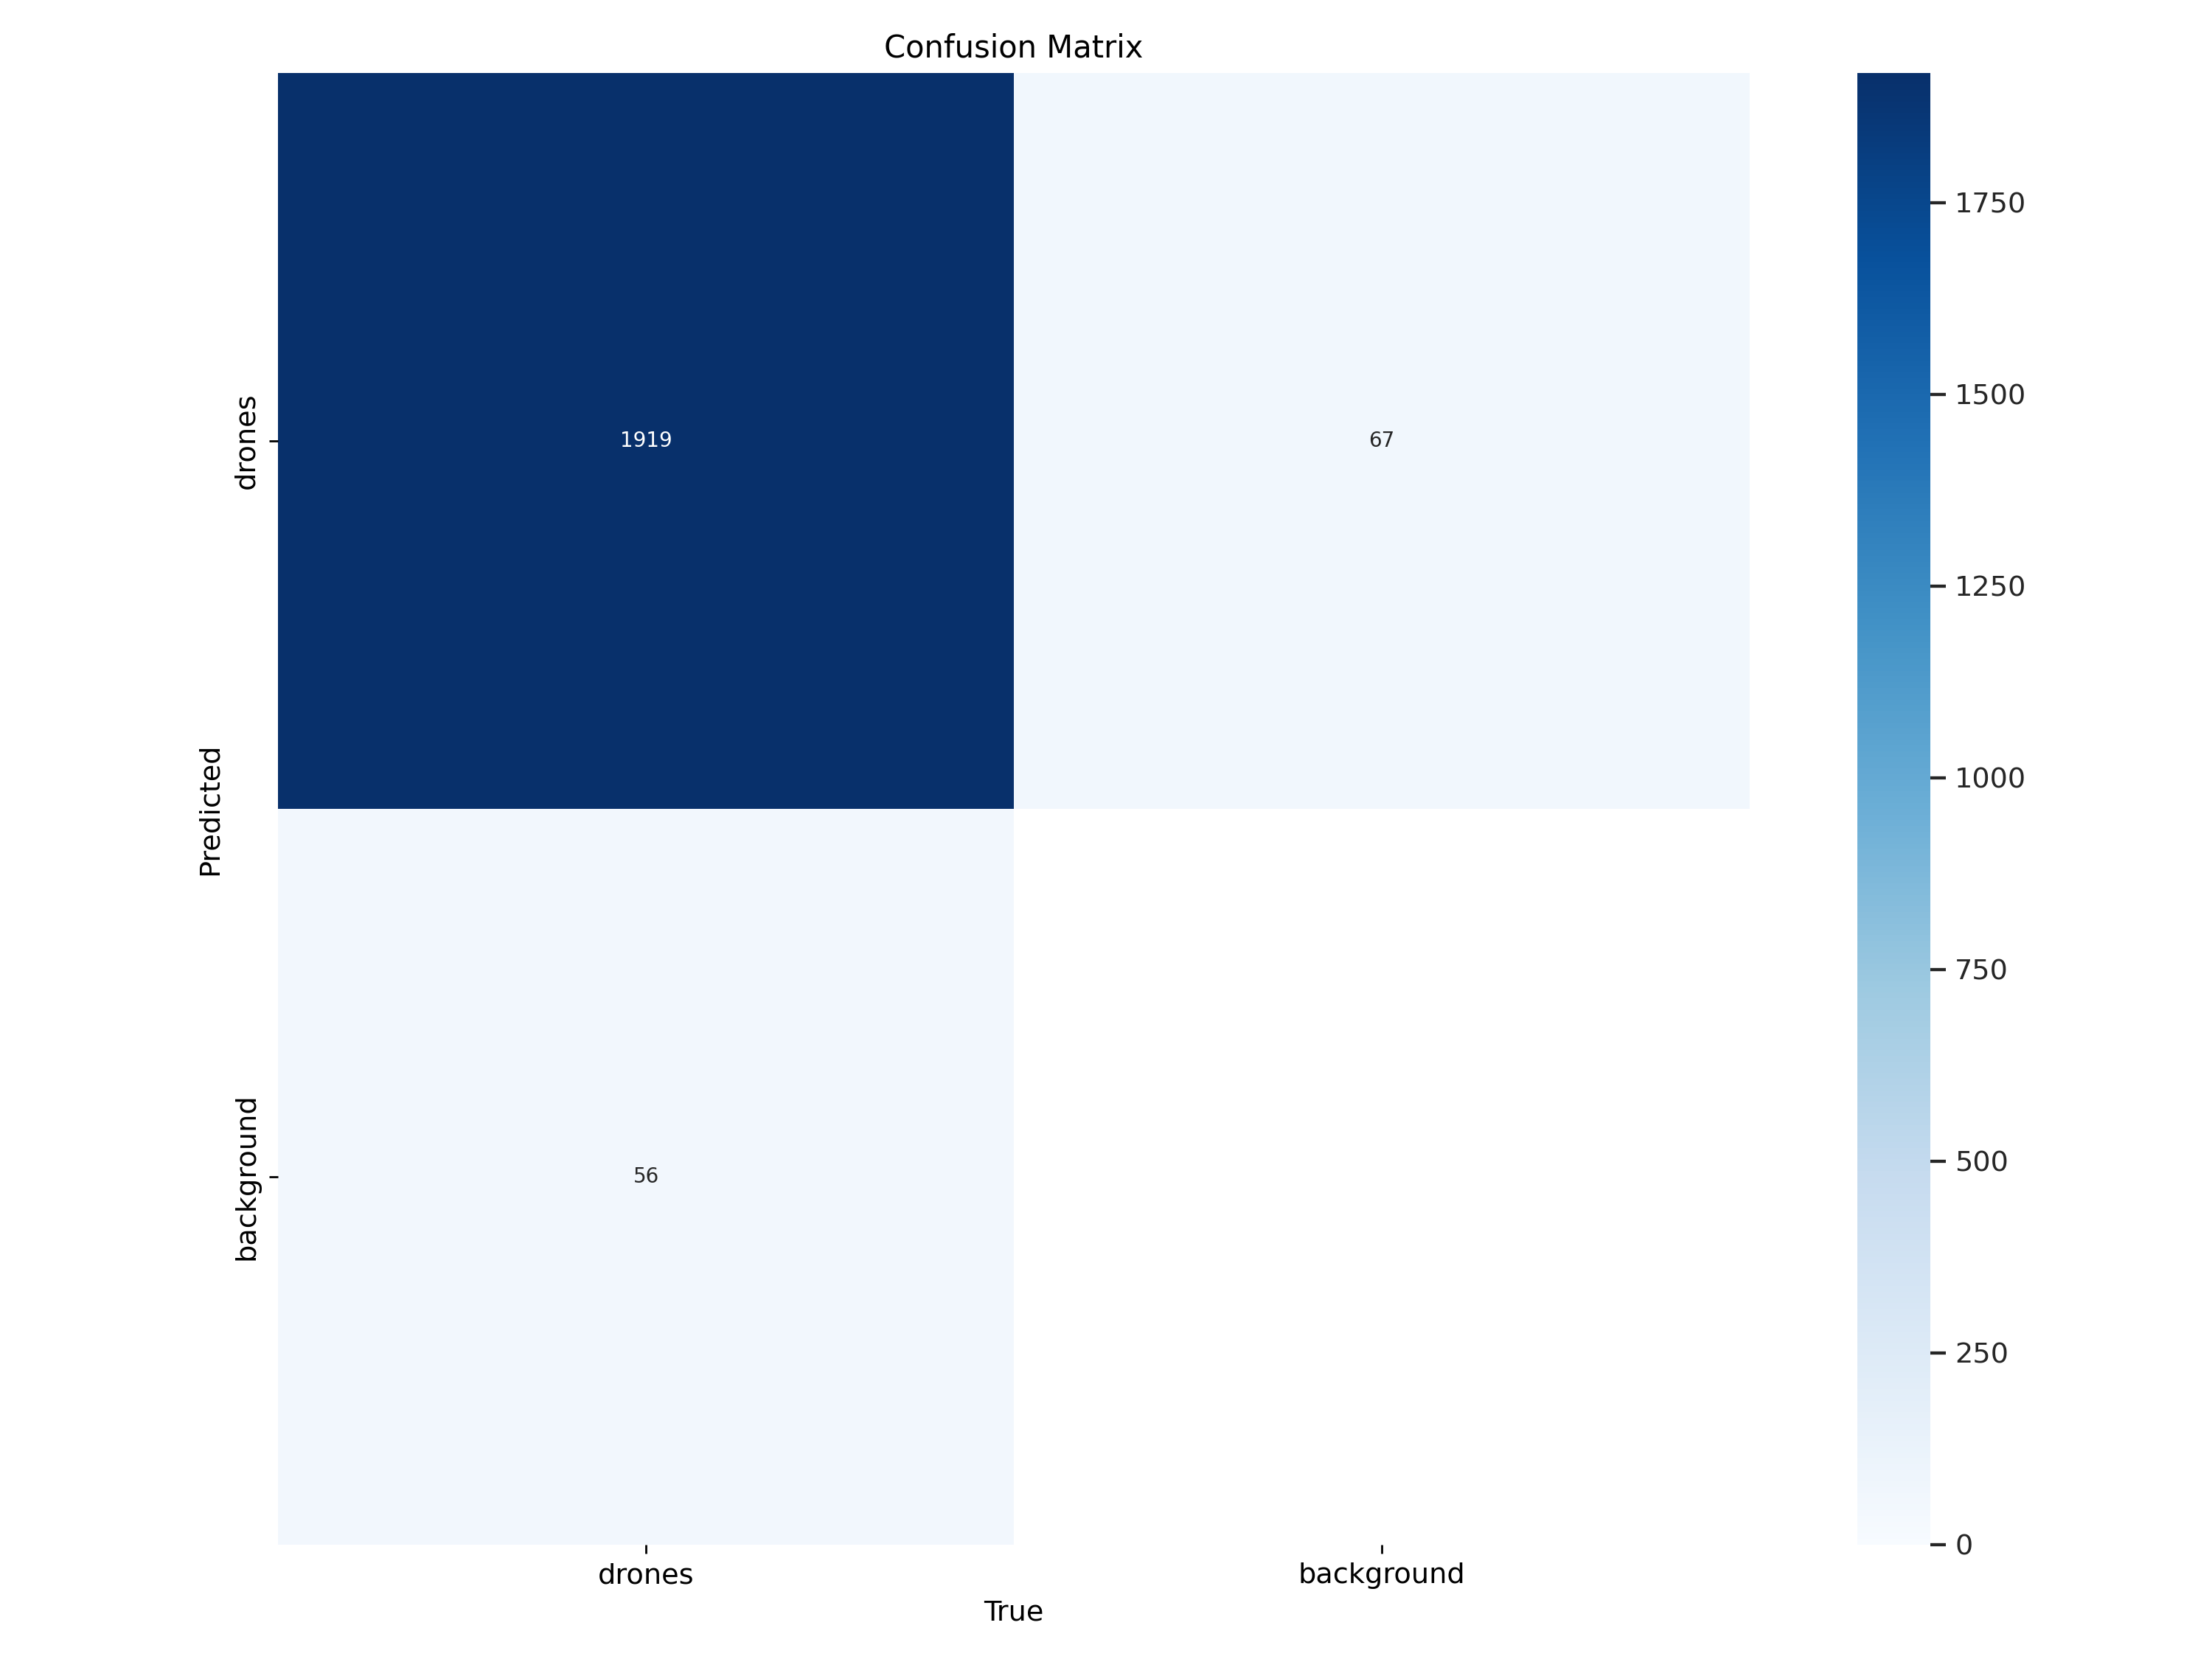

In [13]:
Image("/content/yolo_project_drone_detection/train2/confusion_matrix.png")

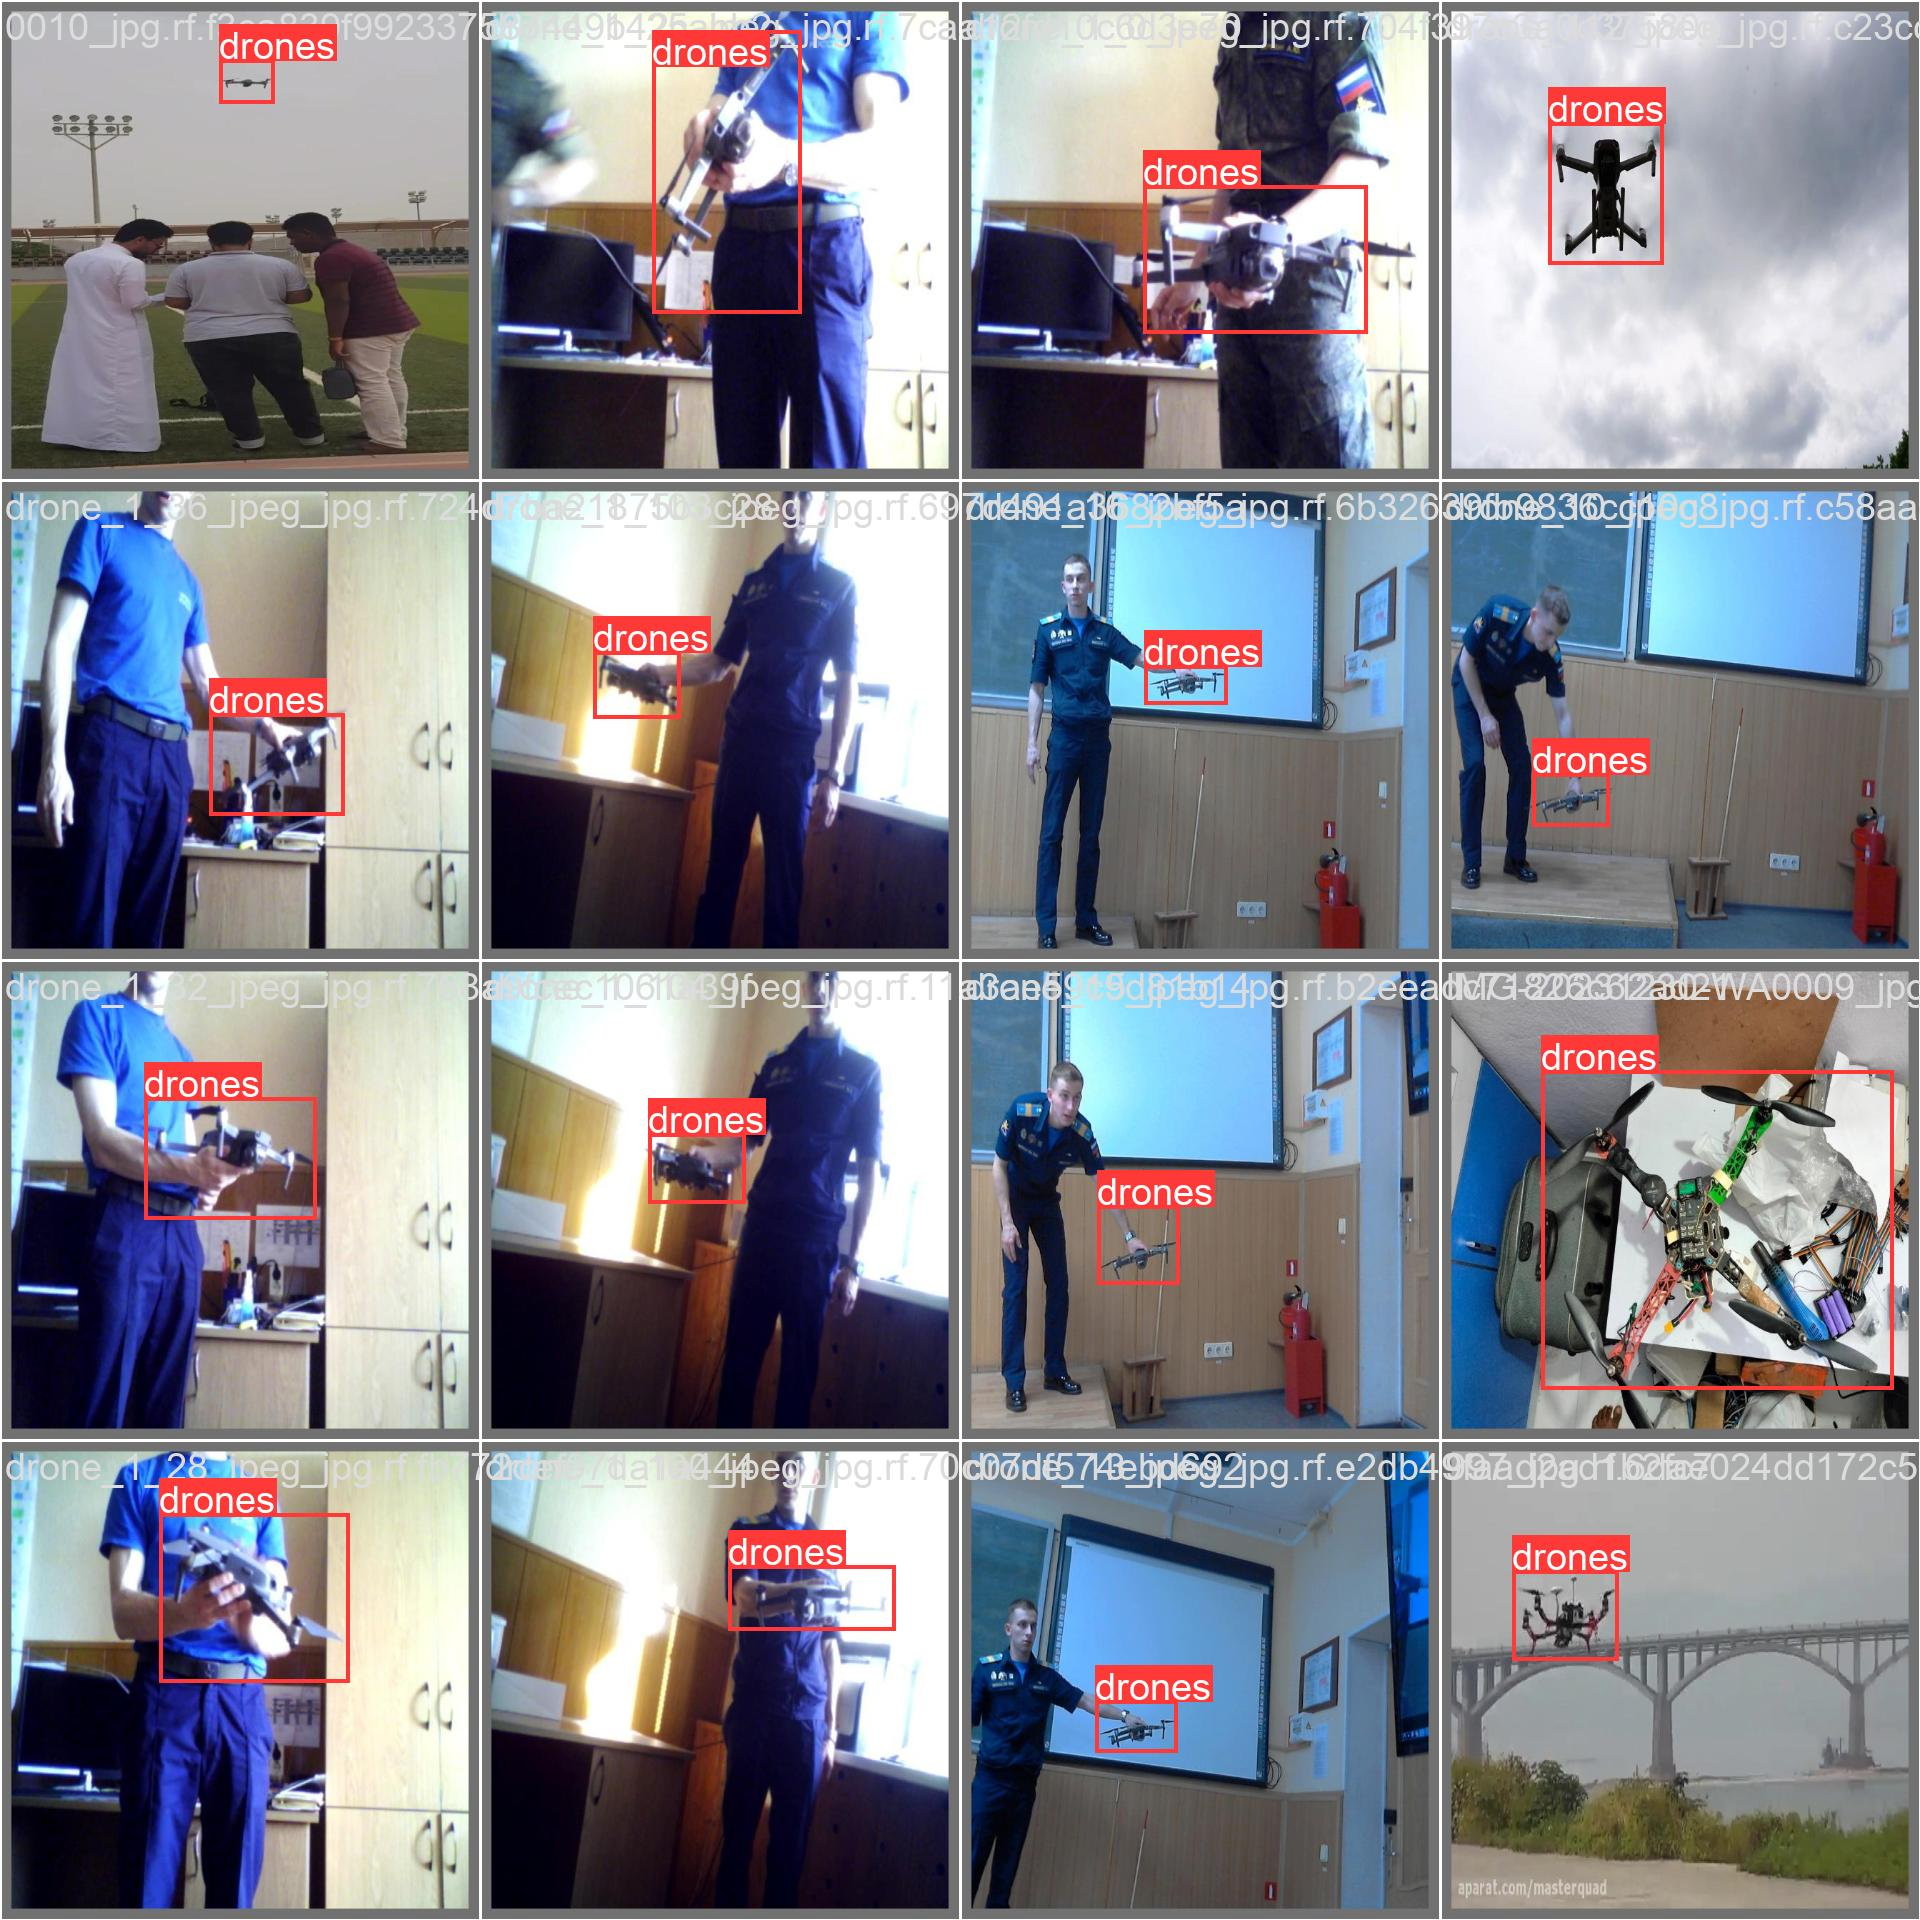

In [15]:
Image("/content/yolo_project_drone_detection/train2/val_batch0_labels.jpg")

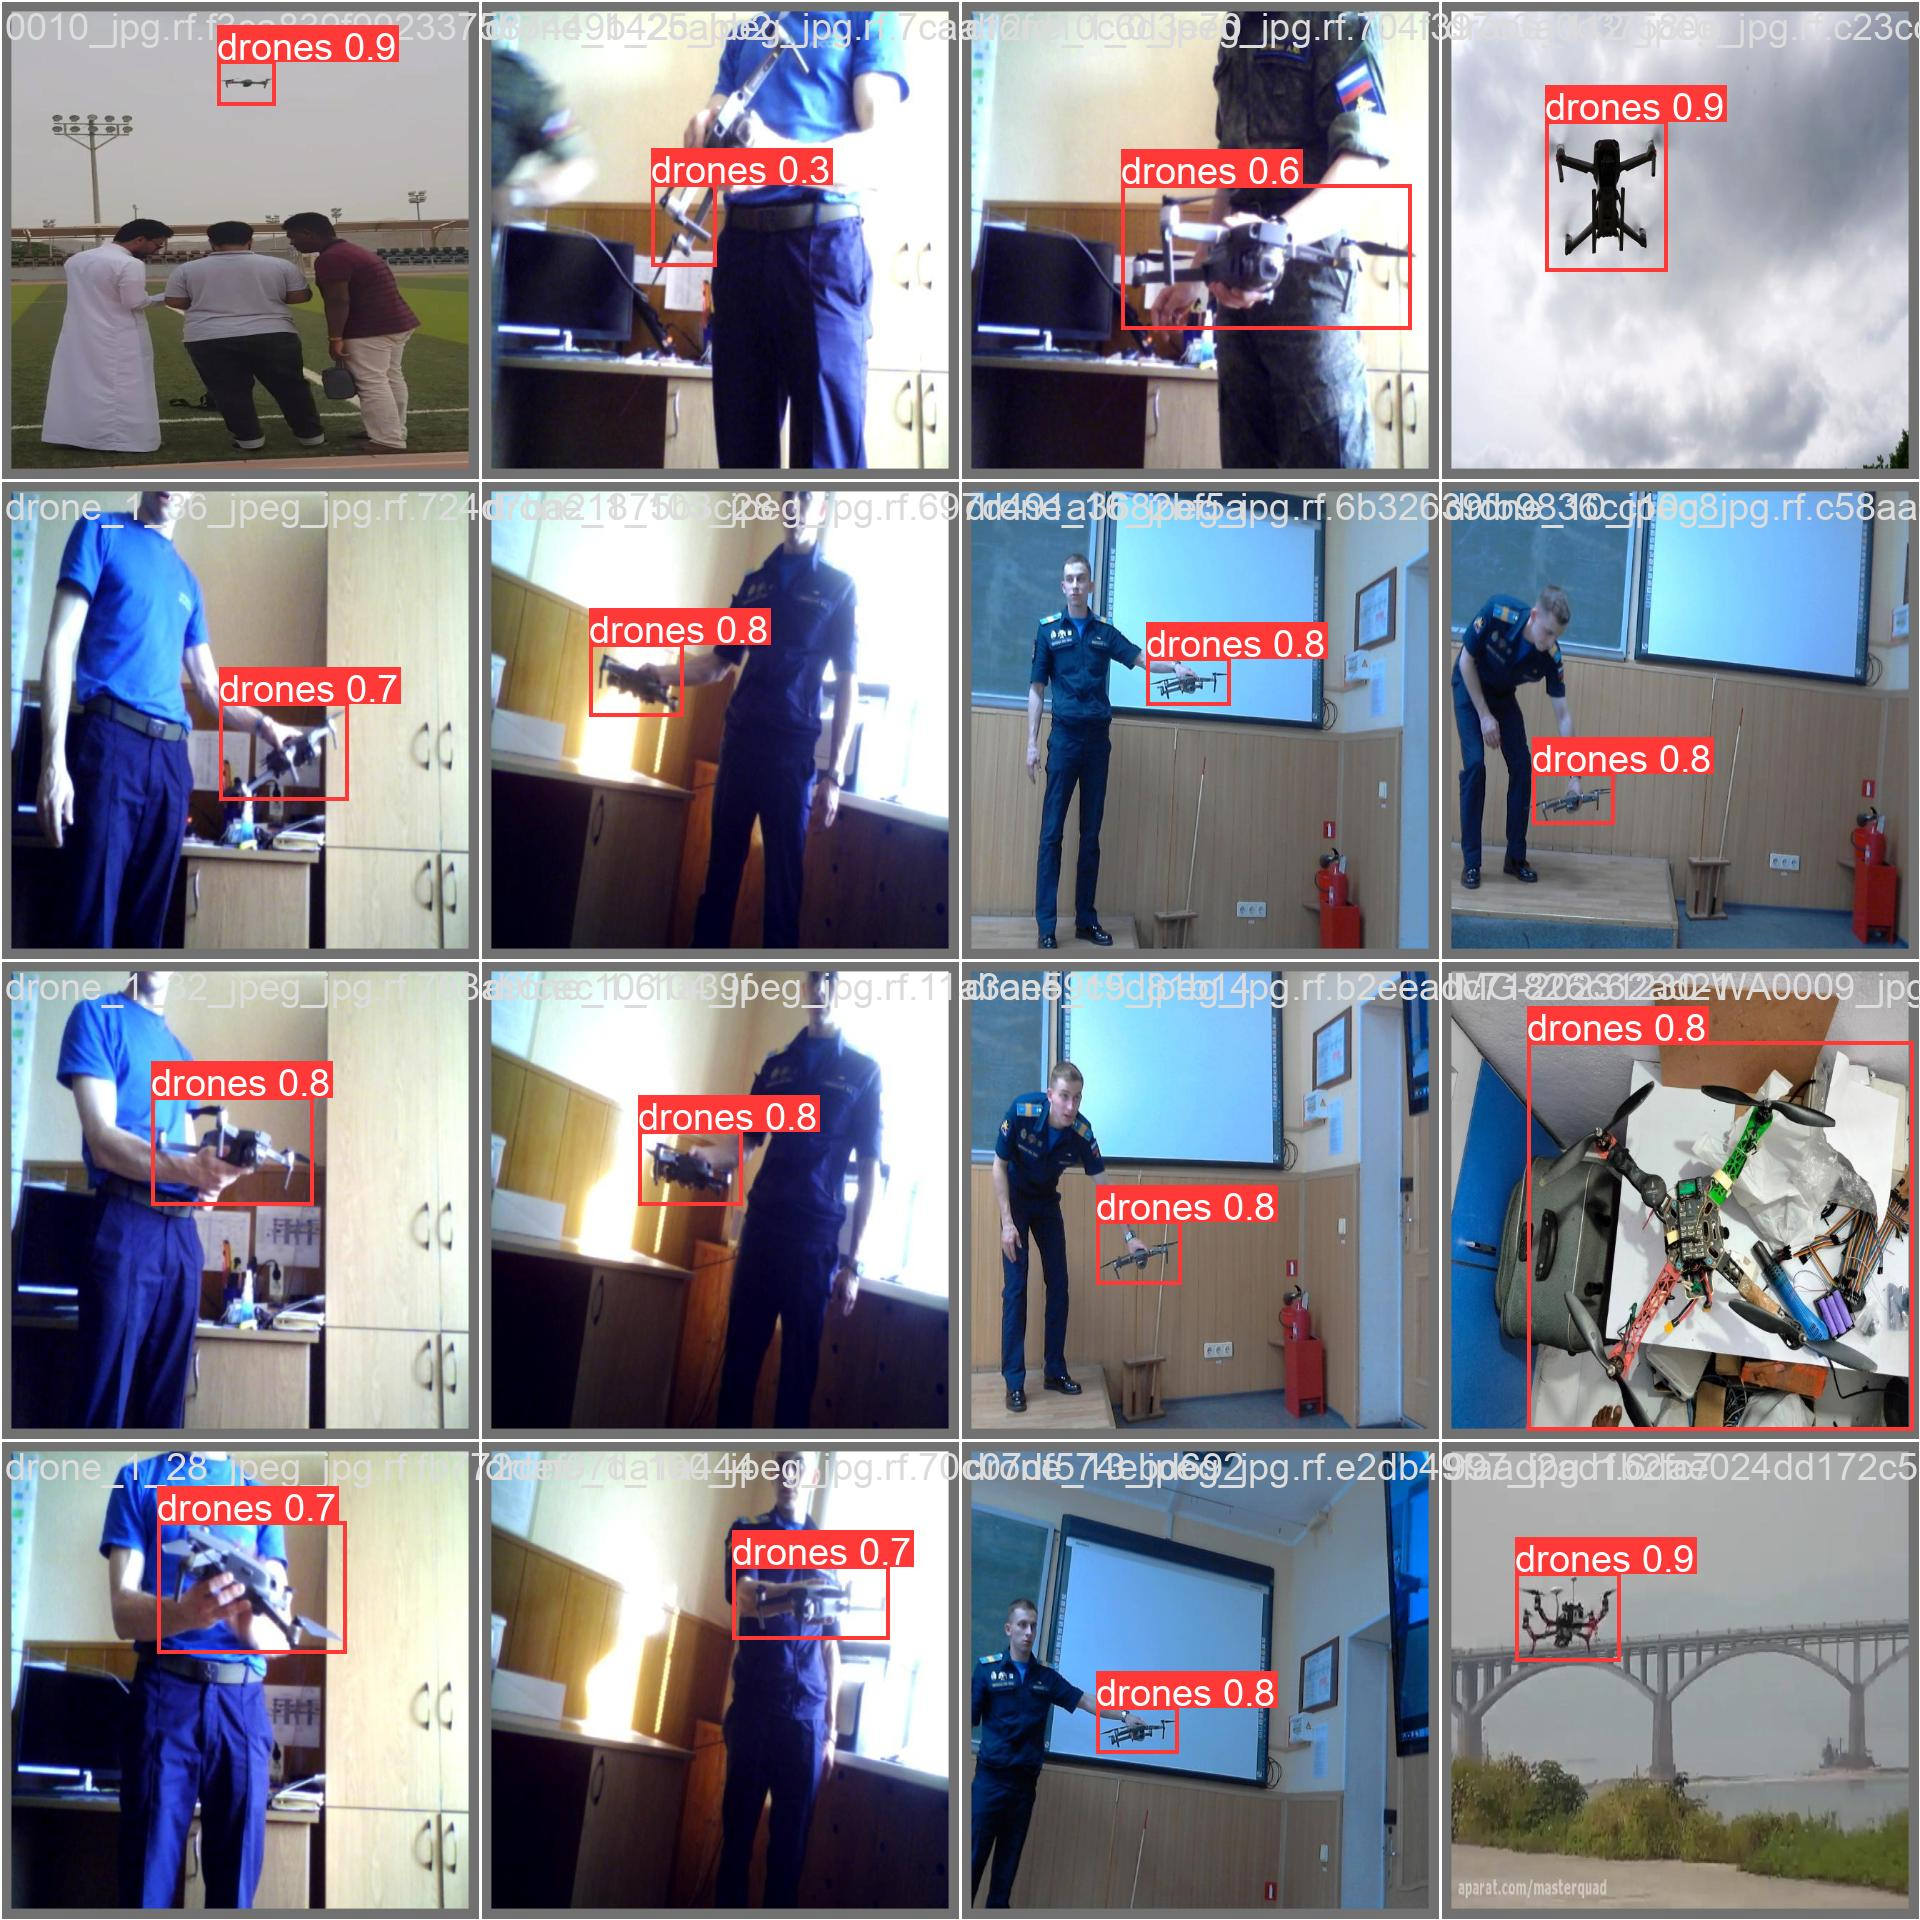

In [14]:
Image("/content/yolo_project_drone_detection/train2/val_batch0_pred.jpg")

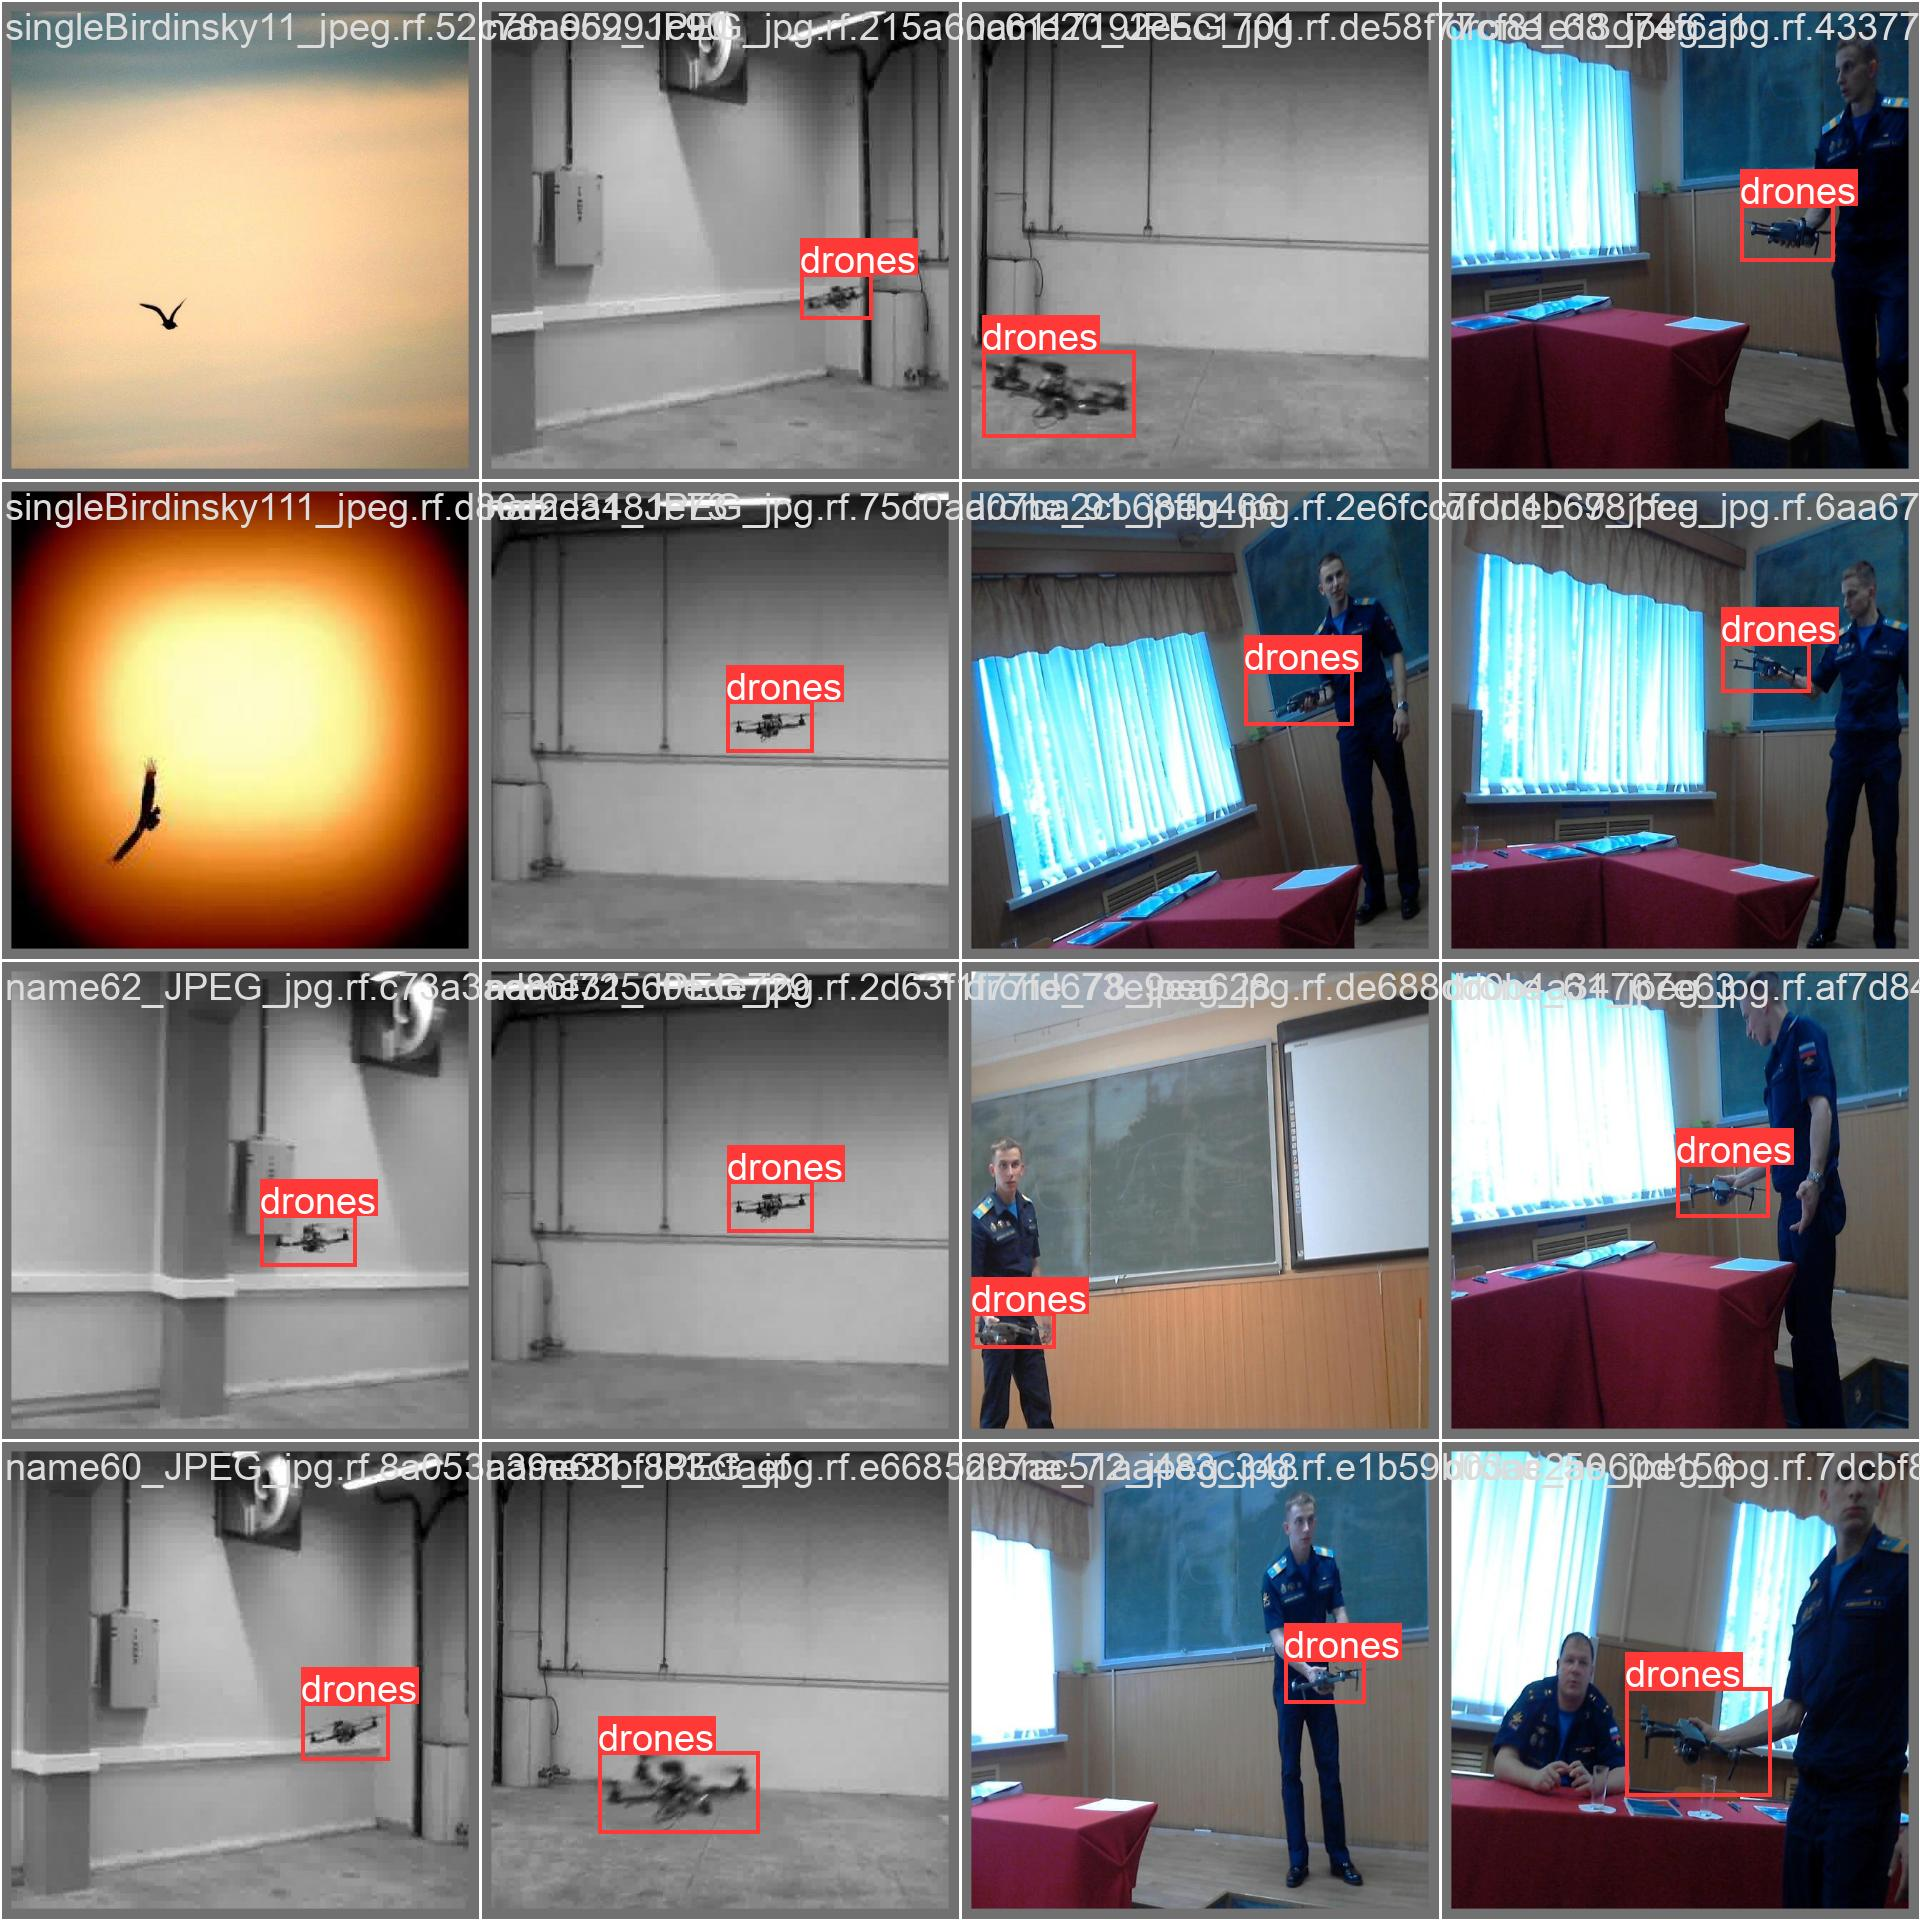

In [16]:
Image("/content/yolo_project_drone_detection/train2/val_batch1_labels.jpg")

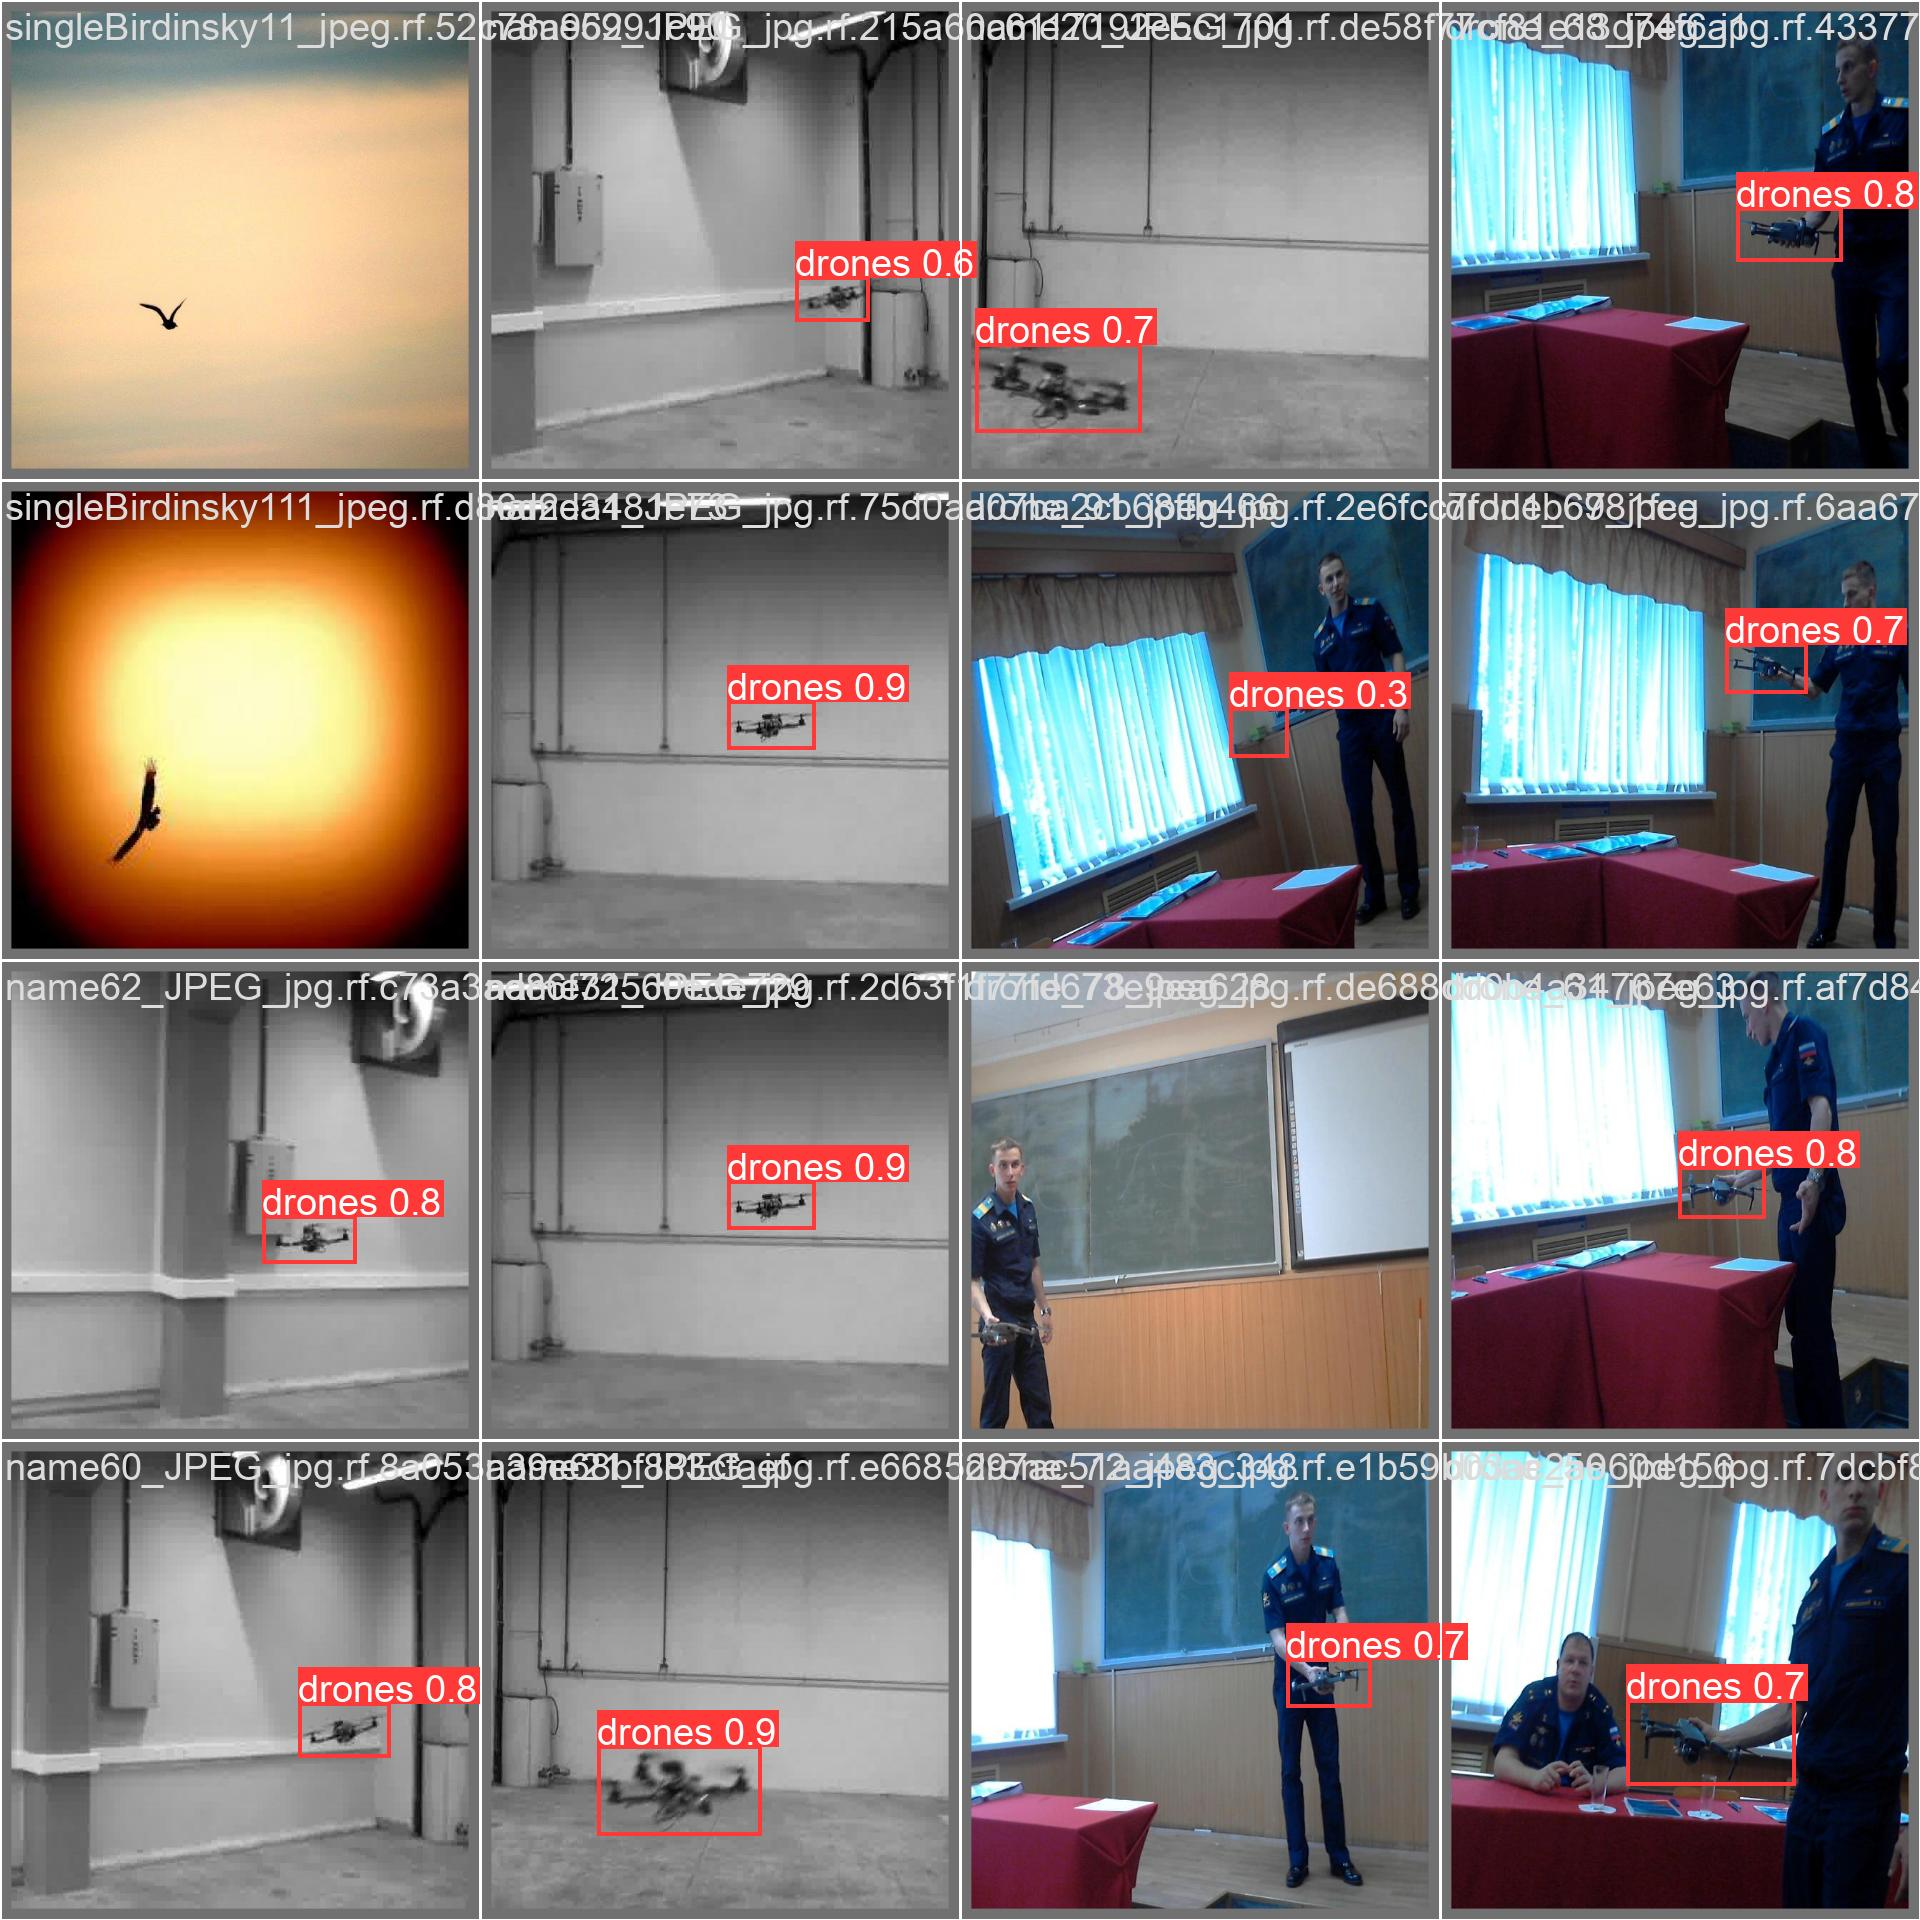

In [17]:
Image("/content/yolo_project_drone_detection/train2/val_batch1_pred.jpg")

In [18]:
model.load("/content/yolo_project_drone_detection/train2/weights/best.pt");

Transferred 355/355 items from pretrained weights


In [19]:
metrics = model.val()

Ultralytics YOLOv8.2.21 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0.1 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/yolo_project_drone_detection/Drone-Detection-6/valid/labels.cache... 1994 images, 145 backgrounds, 0 corrupt: 100%|██████████| 1994/1994 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 7, len(boxes) = 1975. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 125/125 [00:37<00:00,  3.38it/s]


                   all       1994       1975      0.964      0.955      0.976      0.754
Speed: 0.4ms preprocess, 10.0ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to /content/yolo_project_drone_detection/train22


По графику метрик mAP50 и mAP50-95 видно, что можно обучать модель на большем количестве эпох, т.к. модель еще не переобучилась на данных. Не смотря на это модель показала хороший результат метрик mAP50=0.976, что говорит о том, что модель детектирует почти все объекты и mAP50-95, что говорит о том, что модель детектирует объекты с большой вероятностью